<a href="https://colab.research.google.com/github/LeeSeungwon89/Python_for_Data_Analytics_Science/blob/main/3.%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EC%9E%85%EC%B6%9C%EB%A0%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 데이터 입출력 심화**

데이터 입출력은 전 챕터인 **2. 데이터를 다루기 위한 파이썬 패키지**에서 약간 다뤘습니다. 이번 챕터에서는 좀 더 다양한 데이터 형식을 다루는 법과 웹 데이터를 다루는 법을 정리하겠습니다. 각종 서적, 인터넷 정보, **데이터 분석을 위한 파이썬 철저 입문(최은석, 위키북스)**, **파이썬 머신러닝 판다스 데이터 분석(오승환, 정보문화사)**을 참고했습니다.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
cd /content/gdrive/MyDrive/Python_for_Data_Analytics_Science

/content/gdrive/MyDrive/Python_for_Data_Analytics_Science


데이터 분석을 시작하기 전에 먼저 필수적인 라이브러리를 호출해놓고 시작하면 편리합니다. 아래는 관련 목록입니다.

In [2]:
# 기본적인 라이브러리입니다.
import time
import random
import math

# 데이터 분석을 위한 라이브러리입니다.
import numpy as np
import pandas as pd

# 수학 라이브러리입니다.
import scipy as sp
import statsmodels.api as sm

# 웹 스크레이핑을 위한 라이브러리입니다
import re
import requests
from bs4 import BeautifulSoup
import os
import json

# 시각화 라이브러리입니다.
import matplotlib as mpl
import matplotlib.pylab as plb
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

# 시각화 자료를 바로 띄워줍니다.
%matplotlib inline

# 그래프에 retina를 지정합니다.
%config InlineBackend.figure_format = 'retina'

# 음수 부호를 깨지지 않도록 합니다.
mpl.rc('axes', unicode_minus=False)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## **1.1. CSV**

### **1.1.1. 파일 읽기**

`read_csv()` 메서드로 `csv` 파일을 읽습니다. 매개변수 `header`에 행 번호를 인자로 전달하면 해당하는 행을 열명으로 지정합니다. 기본값은 `0`이며 첫 번째 행을 열명으로 삼습니다. 아래에서 예시하겠습니다.

In [ ]:
file_path = '/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/5674-833_4th/part2/read_csv_sample.csv'
pd.read_csv(file_path)

,c0,c1,c2,c3
0,0,1,4,7
1,1,2,5,8
2,2,3,6,9


In [ ]:
pd.read_csv(file_path, header=1)

,0,1,4,7
0,1,2,5,8
1,2,3,6,9


`header=None`으로 지정하면 열로 지정되지 않습니다.

In [ ]:
pd.read_csv(file_path, header=None)

,0,1,2,3
0,c0,c1,c2,c3
1,0,1,4,7
2,1,2,5,8
3,2,3,6,9


매개변수 `index_col`의 기본값은 `None`입니다. 인덱스로 컬럼을 지정하지 않았다는 의미입니다.

In [ ]:
pd.read_csv(file_path, index_col=None)

,c0,c1,c2,c3
0,0,1,4,7
1,1,2,5,8
2,2,3,6,9


`index_col` 매개변수에 'c1' 열을 전달하겠습니다.

In [ ]:
pd.read_csv(file_path, index_col=['c1'])

,c0,c2,c3
c1,,,
1,0,4,7
2,1,5,8
3,2,6,9


다중으로 전달할 수도 있습니다.

In [ ]:
pd.read_csv(file_path, index_col=['c1', 'c0'])

,,c2,c3
c1,c0,,
1,0,4,7
2,1,5,8
3,2,6,9


몇 가지 주요 매개변수에 대한 목록은 아래와 같습니다.

- `sep` or `delimiter`: 각각 데이터를 구분한 구분자를 전달합니다.

- `names`: 열명으로 사용할 문자열 리스트를 전달합니다.

- `skiprows`: 처음 몇 줄을 스킵할 것인지 설정합니다. 예컨대 `[0, 1]`로 지정하면 0행과 1행은 출력하지 않습니다.

- `parse_dates`: 날짜 텍스트를 `datatime64` 형으로 바꿀지 설정합니다. 기본값은 `False`입니다.

- `skip_footer`: 마지막 몇 줄을 스킵할 것인지 설정합니다.

- `encoding`: 텍스트 인코딩 유형을 지정합니다.

### **1.1.2. 파일 저장하기**

`to_csv()` 메서드로 `csv` 파일로 저장할 수 있습니다.

In [ ]:
csv_data = {'name': ['Jerry', 'Riah', 'Paul'],
            'algol': ['A', 'A+', 'B'],
            'basic': ['C', 'B', 'B+'],
            'c++': ['B+', 'C', 'C+']}
df_csv = pd.DataFrame(csv_data)
df_csv

,name,algol,basic,c++
0,Jerry,A,C,B+
1,Riah,A+,B,C
2,Paul,B,B+,C+


인덱스를 'name'으로 지정하겠습니다.

In [ ]:
df_csv.set_index('name', inplace=True)
df_csv

,algol,basic,c++
name,,,
Jerry,A,C,B+
Riah,A+,B,C
Paul,B,B+,C+


`csv` 파일로 저장하겠습니다. `sep` 매개변수에 구분자를 공백(`' '`)으로 지정하고 `encoding` 매개변수에 문자형을 `'cp949'`로 지정하겠습니다.

In [ ]:
df_csv.to_csv('/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/to_csv2.csv',
              sep=',', encoding='cp949')

## **1.2. 엑셀**

### **1.2.1. 파일 읽기**

`read_excel()` 메서드는 `read_csv()` 메서드와 사용법이 거의 같으며 모든 매개변수를 동일하게 가지고 있습니다. `engine` 매개변수의 경우 `xlsx` 파일이면 `openpyxl`을 인자로 지정하고, `xls` 파일이면 `xlrd`를 인자로 지정합니다.

In [ ]:
file_path = '/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/5674-833_4th/part2/남북한발전전력량.xlsx'
pd.read_excel(file_path, engine='openpyxl')

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,2153,2393,2664,2852,3065,3225,3421,3646,3812,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
1,NaN,수력,64,51,49,60,41,55,52,54,61,61,56,42,53,69,59,52,52,50,56,56,65,78,77,84,78,58,66
2,NaN,화력,484,573,696,803,1022,1122,1264,1420,1195,1302,1518,1689,1821,1859,2056,2127,2272,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
3,NaN,원자력,529,563,565,581,587,670,739,771,897,1031,1090,1121,1191,1297,1307,1468,1487,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
4,NaN,신재생,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,86,118,151,173,195
5,북한,합계,277,263,247,221,231,230,213,193,170,186,194,202,190,196,206,215,225,236,255,235,237,211,215,221,216,190,239
6,NaN,수력,156,150,142,133,138,142,125,107,102,103,102,106,106,117,125,131,126,133,141,125,134,132,135,139,130,100,128
7,NaN,화력,121,113,105,88,93,88,88,86,68,83,92,96,84,79,81,84,99,103,114,110,103,79,80,82,86,90,111
8,NaN,원자력,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-


이번에는 직접 생성한 엑셀 파일의 두 번째 시트인 '3월 판매량'을 읽겠습니다. `sheet_name` 매개변수에 `시트 순서 - 1`인 `1`로 지정하거나 시트명인 `'3월 판매량'`을 지정합니다.

In [ ]:
file_path = '/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/직원별 판매량.xlsx'
pd.read_excel(file_path, sheet_name=1)

,성명,마우스,키보드,모니터,스피커
0,임정섭,63,72,37,83
1,박종인,48,11,54,21
2,강원희,69,32,46,24
3,최중규,68,27,23,52
4,이한정,84,57,16,85


### **1.2.2. 파일 저장하기**

`to_excel()` 메서드를 사용하면 엑셀 파일로 저장합니다. `csv` 파일과 같은 방식으로 적용하겠습니다.

In [ ]:
excel_data = {'name': ['Jerry', 'Riah', 'Paul'],
            'algol': ['A', 'A+', 'B'],
            'basic': ['C', 'B', 'B+'],
            'c++': ['B+', 'C', 'C+']}
df_excel = pd.DataFrame(excel_data)
df_excel

,name,algol,basic,c++
0,Jerry,A,C,B+
1,Riah,A+,B,C
2,Paul,B,B+,C+


In [ ]:
df_excel.set_index('name', inplace=True)
df_excel

,algol,basic,c++
name,,,
Jerry,A,C,B+
Riah,A+,B,C
Paul,B,B+,C+


In [ ]:
df_excel.to_excel('/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/to_excel.xlsx')

여러 데이터프레임을 엑셀 파일 하나에 저장할 수 있습니다. 먼저 데이터프레임을 두 개 만들겠습니다.

In [ ]:
excel_data1 = {'name': ['Jerry', 'Riah', 'Paul'],
            'algol': ['A', 'A+', 'B'],
            'basic': ['C', 'B', 'B+'],
            'c++': ['B+', 'C', 'C+']}

excel_data2 = {'c0': [1, 2, 3],
               'c1': [4, 5, 6],
               'c2': [7, 8, 9],
               'c3': [10, 11, 12],
               'c4': [13, 14, 15]}

df1_excel = pd.DataFrame(excel_data1)
df1_excel.set_index('name', inplace=True)

df2_excel = pd.DataFrame(excel_data2)
df2_excel.set_index('c0', inplace=True)

두 데이터프레임을 두 시트에 각각 저장하겠습니다.

In [ ]:
test_excelwriter = pd.ExcelWriter('/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/excelwriter.xlsx')
df1_excel.to_excel(test_excelwriter, sheet_name='sheet1')
df2_excel.to_excel(test_excelwriter, sheet_name='sheet2')
test_excelwriter.save()

### **1.2.3. 파일 통합하기**

엑셀 파일의 개수가 적으면 엑셀 파일을 수작업으로 통합하기 수월하지만 개수가 많으면 쉽지 않습니다. 파이썬을 사용하면 파일 개수가 많더라도 손쉽게 통합할 수 있습니다. 아래는 데이터를 효율적으로 처리하기 위해 데이터를 생성할 때 신경써야 할 몇 가지 요소입니다. 엑셀을 포함하여 다른 모든 형식의 데이터 파일에도 적용됩니다. 

- 열 머리글(header)은 한 줄로 만듭니다.

- 열 머릿글과 데이터 입력 부분에 셀을 병합하지 않습니다.

- 셀 하나에 숫자와 단위를 함께 쓰지 않습니다.

- 열 하나에 입력한 데이터 형식은 모두 같아야 합니다.

- 데이터를 여러 시트로 나누지 않고 최대한 한 시트에 넣습니다.

아래 예시를 통해 파일을 통합하는 과정을 살피겠습니다. 먼저 임의로 생성한 파일을 리스트로 묶고 객체로 넘깁니다.

In [ ]:
ex_f = ['/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/수확량_김의종.xlsx',
        '/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/수확량_유지민.xlsx',
        '/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/수확량_이승원.xlsx']

빈 데이터프레임 객체를 생성하고, `excel_files` 객체의 엑셀 파일을 하나씩 꺼내서 엑셀로 읽습니다. 그리고 빈 데이터프레임에 `append()` 메서드로 엑셀 파일을 하나씩 추가합니다.

In [ ]:
df_all_ex_f1 = pd.DataFrame()

for i in ex_f:
    df_ex_f = pd.read_excel(i)
    df_all_ex_f1 = df_all_ex_f1.append(df_ex_f)

df_all_ex_f1

,과일명,재배인,품질,18년,19년,20년
0,사과,김의종,중,87,52,24
1,딸기,김의종,상,73,16,51
2,포도,김의종,상,43,16,56
0,사과,유지민,중,62,93,60
1,딸기,유지민,상,52,41,45
2,포도,유지민,상,46,37,8
0,사과,이승원,중,39,67,23
1,딸기,이승원,상,79,16,51
2,포도,이승원,상,94,23,72


인덱스가 오름차순으로 부여되지 않았습니다. 매개변수를 `ignore_index=True`로 지정하겠습니다.

In [ ]:
df_all_ex_f2 = pd.DataFrame()

for i in ex_f:
    df_ex_f = pd.read_excel(i)
    df_all_ex_f2 = df_all_ex_f2.append(df_ex_f, ignore_index=True)

df_all_ex_f2

,과일명,재배인,품질,18년,19년,20년
0,사과,김의종,중,87,52,24
1,딸기,김의종,상,73,16,51
2,포도,김의종,상,43,16,56
3,사과,유지민,중,62,93,60
4,딸기,유지민,상,52,41,45
5,포도,유지민,상,46,37,8
6,사과,이승원,중,39,67,23
7,딸기,이승원,상,79,16,51
8,포도,이승원,상,94,23,72


해당 파일은 3개뿐이므로 개별적으로 입력하기 쉽지만 파일 수가 많으면 간단치 않습니다. 여러 파일의 이름을 위 파일들의 이름처럼 같은 형식으로 통일하고(이름만 다르게 하고) 한꺼번에 여러 파일을 가져오려면 [`glob`](https://docs.python.org/ko/3/library/glob.html?highlight=glob#module-glob) 모듈을 활용합니다. `glob` 모듈은 `*`과 `?`를 사용하여 문자열을 긁어옵니다. 와일드카드라고 불리우는 이 기호 중에 `*`은 길이와 무관하게 모든 문자열을 의미하고, `?`는 한 글자로 된 모든 문자열을 의미합니다.

아래는 이 모듈에 대한 예시입니다. 

In [ ]:
import glob

# `glob` 모듈의 `glob` 클래스를 부릅니다.
# 주소는 그대로 나열하고 '*'를 사용하여 모든 문자열을 가져옵니다.
glob.glob('/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/수확량_*.xlsx')

['/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/수확량_김의종.xlsx',
 '/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/수확량_유지민.xlsx',
 '/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/수확량_이승원.xlsx']

위 코드를 사용하여 데이터프레임 하나로 합치겠습니다.

In [ ]:
glob_ex_f = glob.glob('/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/수확량_*.xlsx')

df_all_ex_f3 = pd.DataFrame()

for i in glob_ex_f:
    df_ex_f = pd.read_excel(i)
    df_all_ex_f3 = df_all_ex_f3.append(df_ex_f, ignore_index=True)

df_all_ex_f3

,과일명,재배인,품질,18년,19년,20년
0,사과,김의종,중,87,52,24
1,딸기,김의종,상,73,16,51
2,포도,김의종,상,43,16,56
3,사과,유지민,중,62,93,60
4,딸기,유지민,상,52,41,45
5,포도,유지민,상,46,37,8
6,사과,이승원,중,39,67,23
7,딸기,이승원,상,79,16,51
8,포도,이승원,상,94,23,72


통합한 데이터프레임을 엑셀 파일로 저장하겠습니다.

In [ ]:
# 파일명 객체를 만듭니다.
ex_file_name = '/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/수확량_통합.xlsx'
# `ExcelWriter()` 객체를 만듭니다.
ex_total_file_writer = pd.ExcelWriter(ex_file_name)
# 데이터프레임 객체를`to_excel(`ExcelWriter()` 객체)`로 엑셀화합니다.
df_all_ex_f3.to_excel(ex_total_file_writer, index=False, sheet_name='수확량_통합_최종')
# 최종적으로 저장합니다.
ex_total_file_writer.save()

glob.glob('/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/수확량_통합.xlsx')

['/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/수확량_통합.xlsx']

### **추가. 정규 표현식**

만약 파일명이 통일되지 않았거나 파일 수가 많아서 모든 파일명을 통일하기 어렵다면 [`re`](https://docs.python.org/ko/3/library/re.html#) 모듈로 [정규 표현식](https://docs.python.org/ko/3/howto/regex.html)을 활용할 수 있습니다. 정규 표현식은 매우 중요한 개념이므로 추가 파트를 만들었습니다.

정규 표현식이란 규칙을 지닌 문자열 집합을 표현하는 데 사용하는 형식 언어이며, 문자열 검색과 치환 용도로 활용됩니다.

정규 표현식에 사용하는 기호를 [메타문자](https://naudhizb.tistory.com/857)라고 부릅니다. POSIX의 정규 표현식과 POSIX 정규 표현식에서 확장된 Perl 방식의 PCRE가 대표적인 정규 표현식입니다. 이외에도 여러 정규 표현식이 있고 차이점도 존재하지만 대체적으로 비슷한 형식입니다.

아래는 몇 가지 정규 표현식 방법입니다. 먼저 [메타문자 예시](https://codetorial.net/python/regular_expression/regex_metacharacters.html)를 살펴보는 편이 좋습니다. 아래 예시는 `findall()` 메서드에 기반합니다.

- `\`: 앞에 오는 문자를 특수 문자, 리터럴, 역참조, 8진수 이스케이프로 표현합니다.
  - `\\`: **\**
  - `\}`: **}**

- `^x`: x의 시작 부분에서 위치를 찾습니다.
  - `^ab`: **a**bcde

- `x$`: x의 끝 부분에서 위치를 찾습니다.
  - `e$`: cak**e**

- `x{n}`: x를 n번만큼 반복합니다. `{n,}`는 n번 이상 반복합니다.
  - `ca{3}n`: **caaan**

- `x{n, m}`: x를 n과 m 사이만큼 반복합니다.
  - `ca{2, 3}n`: **caan**, **caaan**

- `x*` == `x{0,}`: x를 0개 이상 찾습니다.
  - `ab*`: **ab**, **aaabb**, **abbb**
  - `ab*c`: **abc**, **ac**, **aabbbc**

- `x+` == `x{1,}`: x를 1개 이상 찾습니다.
  - `Le+`: **Le**, **Lee**, **Leee**

- `x?` == `x{0, 1}`: x를 0개나 1개만큼 찾습니다.
  - `ca?n`: **can**, **cn**

- `.`: 줄바꿈 문자를 제외한 모든 문자입니다.
  - `.n`: **an** egg, **in** a box
  - `.*`: 아무 문자도 없거나 임의의 문자가 1회 이상 반복되는 문자열을 찾습니다.
  - `^ab.*`: ab로 시작(`^`)하는 모든 문자열을 찾습니다.
  - `.+`: 모든 문자열을 찾습니다.
  - `r.*e`: r로 시작하고 e로 끝나는 임의의 문자열을 찾습니다.
  - `ab.`: ab로 시작하는 모든 세 문자를 찾습니다.

- `(x)`: x를 체크하고, 체크한 값을 변수로 저장합니다.
  - `(b..)(a..)`: **box**, **ace**

- `(?:x)`: x를 체크하고, 체크한 값을 변수로 저장하지 않습니다.
  - `(?:b..)(a..)`: **ace**

- `x(?=y)`: x와 일치한 y의 시작 위치에서 검색할 문자열을 찾습니다.
  - `amazing(?=grace|star)`: **amazinggrace**, **amazingstar**

- `x(?!y)`: x와 불일치한 y의 시작 위치에서 검색할 문자열을 찾습니다.
  - `amazing(?!star)`: **amazinggrace**, **amazing grace**

- `[xyz]`: 문자 집합이나 괄호로 묶인 문자 중에 하나를 찾습니다.
  - `[abcd]`: gr**ace**

- `[^xyz]`: 음수 문자 집합, 괄호로 묶이지 않은 문자를 찾습니다.
  - `[^a-z]`: **T**his is **S**parta.

- `[x-y]`: x와 y 범위에서 문자를 찾습니다.
  - `[a-i]`: T**his** **i**s Sp**a**rt**a**.

- `[^x-y]`: 음의 문자 범위, x와 y 범위에 해당하지 않은 문자를 찾습니다.
  - `[A-Z]`: T**his** **is** S**parta**.

- `[^x|y]`: x와 y를 제외한 모든 문자를 찾습니다.

- `[\b]`: 백스페이스를 의미합니다.

- `[-]`: '-'가 문자로 인식되려면 첫 번째나 마지막에 위치해야 합니다.

- `[[]`: '['가 문자로 인식되려면 첫 번째나 '^' 다음에 위치해야 합니다.

- `x|y`: x 또는 y를 찾습니다.
  - `g|star`: **g**, **star**
  - `(g|s)tar`: **gtar**, **star**

- `x\b`: 단어와 공백 사이의 문자 위치를 찾습니다.
  - `ce\b`: gra**ce**, kacet

- `x\B`: `\b`가 아닌 모든 문자 위치를 찾습니다.
  - `ce\B`: grace, ka**ce**t

- `\cx`: 문자로 표시된 제어 문자를 찾습니다.
  - `\cM`: Control-M 또는 캐리지 리턴 문자

- `\A`: 문자열의 시작 위치를 찾습니다.

- `\z`: 문자열의 끝 위치를 찾습니다.

- `\d` == `[0-9]`: 숫자를 찾습니다.

- `\D` == `[^0-9]`: 숫자가 아닌 문자를 찾습니다.

- `\f` == `\xOc`, `\cL`: 용지 공급 문자를 찾습니다.

- `\n` == `\xOc`, `\cJ`: 줄 바꿈 문자를 찾습니다.

- `\r` == `xOd`, `\cM`: 캐리지 리턴 문자를 찾습니다.

- `\s` == `[\f\n\r\t\v]`: 공백, 탭, 용지 공급 등을 비롯한 모든 공백 문자를 찾습니다.

- `\S` == `[^\f\n\r\t\v]`: `\s`와 반대 개념으로 공백이 아닌 문자를 찾습니다.

- `\t` == `\x09`, `\cL`: 탭 문자를 찾습니다.

- `\v` == `x09`, `cK`: 세로 탭 문자를 찾습니다.

- `\w` == `[A-Za-z0-9_]`: 밑줄을 포함한 모든 문자를 찾습니다.

- `\W` = `[^A-Za-z0-9_]`: 비단어 문자를 찾습니다.

- `\0`: 널 문자를 찾습니다.

- `\xn`: 16진수 이스케이프 값인 n을 찾습니다. ASCII 코드가 정규식에 사용될 수 있습니다.
  - `\x41`: **A**
  - `\x041`: **\x04 & 1**

- `[:alnum]` == `[A-Za-z0-9]`: 알파벳과 숫자입니다.

- `[:alpha:]` == `[A-Za-z]`: 알파벳입니다.

- `[:black:]` == `[/t]`: 공백과 탭입니다.

- `[:cntrl:]` == `[\x00-\x1F\x7f]`: 컨트롤 문자를 의미합니다.

- `[가-힣]`: 전체 한글입니다.

플래그는 아래와 같습니다. 여러 플래그를 지정하려면 `|`를 사용합니다.

- `g`: 전체를 검색합니다.

- `i`: 대소문자를 무시합니다.

- `m`: 전체 줄을 검색합니다.

- `s`: 전체 줄을 한 줄처럼 일치할 때까지 검색합니다.

- `y`: 현재 위치부터 검색합니다.

정규 표현식으로 파일을 찾는 방법을 설명하기 전에, 먼저 아래 문자열에서 문자열이나 특정 문자가 존재하는지 여부와 위치를 확인하는 방법을 예시하겠습니다.

In [ ]:
'95' in 'bcvxas1q'

False

In [ ]:
'95' in 'bcvxas1q956'

True

`find()` 메서드와 `index()` 메서드는 매우 유사합니다. 처음 위치한 문자열을 찾습니다. `('찾는 문자열'[, 시작위치[, 끝위치]])` 형식입니다. 차이점은 아래와 같습니다.

- `find()`

  - 찾는 문자열이 없으면 `-1`을 출력합니다.

  - 문자열만 가능합니다. 리스트, 튜플, 딕셔너리와 사용할 수 없습니다. 

- `index()`

  - 찾는 문자열이 없으면 `AttributeError`가 뜹니다.

  - 문자열, 리스트, 튜플과 사용할 수 있습니다. 딕셔너리와는 사용할 수 없습니다. 

In [ ]:
str1 = 'sadg135asd'
print("find('s'):", str1.find('s'))
print("find('asd'):", str1.find('asd'))
print("find('s', 3):", str1.find('s', 3))
print("find('c'):", str1.find('c'))

find('s'): 0
find('asd'): 7
find('s', 3): 8
find('c'): -1


In [ ]:
# `find()` 메서드와 동일한 결괏값입니다. 찾을 값이 없으면 애러가 납니다.
print(str1.index('s'))
print(str1.index('asd'))
print(str1.index('s', 3))
# print(str1.index('c'))

0
7
8


만약 정수만 찾는다면 위 형식으로는 불가능합니다. 여기서 정규 표현식을 활용하면 원하는 값을 찾을 수 있습니다. `findall()` 메서드는 `(패턴, 패턴을 적용할 대상)` 형식으로 인자를 지정해서 사용합니다. 패턴을 적용할 대상을 기준으로 패턴에 따른 값을 도출합니다. 해당 메서드는 [메타문자 예제](https://codetorial.net/python/regular_expression/regex_metacharacters.html)에 명쾌한 설명으로 예시되어 있습니다.

In [ ]:
import re

# 정수를 찾되 문자열은 하나씩 찾습니다.
print(re.findall('\d', 'asdgnkj512f6hjk72'))
# 정수를 찾되 문자열이 1개 이상 덩어리로 나열되게(`+`) 찾습니다.
print(re.findall('\d+', 'asdgnkj512f6hjk72'))

['5', '1', '2', '6', '7', '2']
['512', '6', '72']


이제 `re` 모듈이 가진 메서드들을 하나씩 살피겠습니다.

먼저 `match(패턴, 문자열[, 플래그])` 메서드는 문자열 첫 부분부터 살펴서 패턴과 일치하는지 확인합니다.

In [ ]:
print(re.match('a', 'abc'))
print(re.match('ab', 'abc'))
print(re.match('abc', 'abc'))
print(re.match('b', 'abc'))

<re.Match object; span=(0, 1), match='a'>
<re.Match object; span=(0, 2), match='ab'>
<re.Match object; span=(0, 3), match='abc'>
None


첫 부분이 일치하지 않는 'b'는 `None`으로 출력됐습니다.

`fullmatch(패턴, 문자열[, 플래그])` 메서드는 패턴이 문자열 전체와 정확하게 일치하는지 확인합니다.

In [ ]:
print(re.fullmatch('aabbaabb', 'aabbaabb'))
print(re.fullmatch('aabbaabb', 'aabbaabb123'))

<re.Match object; span=(0, 8), match='aabbaabb'>
None


`search(패턴, 문자열[, 플래그])` 메서드는 `match()` 메서드와 달리 문자열의 첫 부분이 불일치해도 무관합니다. 전체 문자열 중에 하나만 일치해도 결괏값을 출력합니다. 정규식에 가장 많이 활용되는 메서드이기도 합니다. 

In [ ]:
print(re.search('b', 'abc'))

<re.Match object; span=(1, 2), match='b'>


`findall(패턴, 문자열[, 플래그])` 메서드는 문자열에 맞는 패턴에 대한 결괏값을 리스트로 반환합니다. 위 [메타문자 예시](https://codetorial.net/python/regular_expression/regex_metacharacters.html)에서 이 메서드를 사용했습니다.

In [ ]:
print(re.findall('a', 'ab'))
print(re.findall('a', 'abaa'))
print(re.findall('aa', 'aaaa'))
print(re.findall('aa', 'aaaaa'))
print(re.findall('\d', 'asdg32fd6rg777ae'))
print(re.findall('\d+', 'asdg32fd6rg777ae'))
print(re.findall('\D+', 'asdg32fd6rg777ae'))

['a']
['a', 'a', 'a']
['aa', 'aa']
['aa', 'aa']
['3', '2', '6', '7', '7', '7']
['32', '6', '777']
['asdg', 'fd', 'rg', 'ae']


`finditer(패턴, 문자열[, 플래그])` 메서드는 `findall()` 메서드와 달리 iterator 형식으로 출력합니다. `Match object`를 여러번 출력하므로 for문을 통해 출력값을 얻어야 합니다. 패턴과 일치하는 문자열의 위치를 파악하는 데 자주 쓰입니다.

In [ ]:
print(re.finditer('a', 'ababa'))

In [ ]:
test_fi = re.finditer('a', 'ababa')
for i in test_fi:
    print(i)

<re.Match object; span=(0, 1), match='a'>
<re.Match object; span=(2, 3), match='a'>
<re.Match object; span=(4, 5), match='a'>


`split(패턴, 문자열[, 쪼갤 횟수, 플래그])` 메서드는 패턴이 문자열과 일치하면 그 일치하는 부분부터 쪼개서(split) 리스트로 반환합니다. 패턴을 구분자로 간주한다고 생각하면 쉽습니다. 쪼갤 양(maxsplit)은 최대 몇 번까지 나눌 것인지 설정하는 매개변수입니다. 0 이면 모든 문자열을 나누고, 0보다 크면 그 횟수만큼만 나누고 남은 문자열은 그대로 반환됩니다.

In [ ]:
print(re.split('a', 'ababab'))

['', 'b', 'b', 'b']


패턴 'a'를 구분자로 삼았습니다. 'ababab'에서 처음 문자는 패턴인 'a'입니다. 이 경우 출력되는 첫 값은 ''입니다. 처음 문자가 패턴이 아니면 공백값으로 출력되지 않습니다.

In [ ]:
print(re.split('a', '1ababab'))

['1', 'b', 'b', 'b']


쪼갤 횟수를 설정하겠습니다. 구분자를 횟수만큼만 적용합니다. 횟수만큼 쪼개면 나머지 값은 그대로 출력됩니다.

In [ ]:
print(re.split('a', '1ababab', 1))
print(re.split('a', '1ababab', 2))
print(re.split('a', '1ababab', 3))

['1', 'babab']
['1', 'b', 'bab']
['1', 'b', 'b', 'b']


`sub(패턴, 바꿀 문자열, 문자열[, 최대 교체 횟수, 플래그])` 메서드는 문자열에 대한 패턴을 바꿀 문자열로 교체합니다. 

In [ ]:
print(re.sub('a', '77', 'abcdabcd'))
print(re.sub('a', '77', 'abcdabcd', 1))

77bcd77bcd
77bcdabcd


`subn(패턴, 바꿀 문자열, 문자열[, 최대 교체 횟수, 플래그])` 메서드는 `sub()` 메서드와 거의 같습니다. 다만 매칭 횟수가 함께 출력됩니다.

In [ ]:
print(re.subn('a', '77', 'abcdabcd'))

('77bcd77bcd', 2)


`compile(패턴[, 플래그])` 메서드는 패턴을 정규식 객체로 반환합니다. 정규식은 컴파일이라는 무거운 계산 과정을 거칩니다. 모듈에서 메서드를 계속 가져오면 컴파일 계산을 반복해야 합니다. 아울러 동일한 정규식 패턴을 반복문에서 사용하면 성능상 부담이 큽니다. 여기서 `compile()` 메서드는 유용하게 사용됩니다.

In [ ]:
a_com = re.compile('a')

print(a_com.sub('77', 'abcdabcd'))
print(a_com.split('babcdabcd'))

77bcd77bcd
['b', 'bcd', 'bcd']


`purge()` 메서드는 `compile()` 메서드로 생성한 객체가 저장된 캐시를 초기화(제거)합니다.

In [ ]:
re.purge()

`escape(패턴)` 메서드는 패턴에 특수문자가 있으면 백슬래시를 붙입니다.

In [ ]:
re.escape('() #$^*-+[]{}|?.')

'\\(\\)\\ \\#\\$\\^\\*\\-\\+\\[\\]\\{\\}\\|\\?\\.'

위에서 `Match object` 형식으로 출력되는 메서드들을 설명했습니다. 이 형식에서 원하는 정보만 가져올 수 있는 방법은 `Match object` 형식과 관련된 메서드를 적용하는 것입니다.

먼저 `group()` 메서드입니다. 패턴에 일치하는 문자열을 추출합니다.

In [ ]:
a_sch = re.match('a', 'abca')

a_sch.group()

'a'

`start()` 메서드는 문자열에서 패턴이 일치하는 처음 위치를 반환합니다.

In [ ]:
a_sch.start()

0

`end()` 메서드는 문자열에서 패턴이 일치하는 마지막 위치를 반환합니다.

In [ ]:
a_sch.end()

1

`span()` 메서드는 범위입니다.

In [ ]:
a_sch.span()

(0, 1)

소괄호 형태로 패턴을 묶어서 탐색하는 경우에는 `group(숫자)` 메서드와 `groups()` 메서드를 활용할 수 있습니다. 반드시 소괄호로 묶은 형태여야 합니다. 휴대폰 번호를 예시로 들겠습니다.

In [ ]:
s_num_mat1 = re.match('(\d{3})-(\d{4})-(\d{4})', '010-1111-2222')

# `0`은 생략할 수 있습니다.
print(s_num_mat1.group(0))
print(s_num_mat1.group(1))
print(s_num_mat1.group(2))
print(s_num_mat1.group(3))
print(s_num_mat1.groups())

010-1111-2222
010
1111
2222
('010', '1111', '2222')


소괄호를 제거해서 적용하겠습니다. 소괄호로 묶지 않으면 그룹이 1개입니다.

In [ ]:
s_num_mat2 = re.match('\d{3}-\d{4}-\d{4}', '010-1111-2222')

# 그룹이 1개이므로 첫 번째 그룹을 의미하는 `group(1)`은 애러입니다.
print(s_num_mat2.group())
# 여러 그룹이 아니므로 `groups()`는 무의미한 메서드입니다.
print(s_num_mat2.groups())

010-1111-2222
()


`groupdict()` 메서드는 지정한 문자열에 맞게 키로 출력되고, 값은 패턴에 따라 출력됩니다. `dict`는 딕셔너리를 의미하므로 세트 형식으로 출력합니다. 지정한 문자열을 적용하려면 `?P<문자열>` 형식을 패턴 왼쪽에 붙입니다. 소괄호는 필수입니다.

In [ ]:
s_num_mat3 = re.match('(?P<공통>\d{3})-(?P<중간번호>\d{4})-(?P<끝번호>\d{4})', '010-1111-2222')

print(s_num_mat3)
print(s_num_mat3.group())
print(s_num_mat3.group(1))
print(s_num_mat3.group(2))
print(s_num_mat3.group(3))
print(s_num_mat3.groups())
print(s_num_mat3.groupdict())

<re.Match object; span=(0, 13), match='010-1111-2222'>
010-1111-2222
010
1111
2222
('010', '1111', '2222')
{'공통': '010', '중간번호': '1111', '끝번호': '2222'}


추가 개념은 [링크](https://blog.naver.com/PostView.nhn?blogId=dudwo567890&logNo=130162403749)를 참고하시기 바랍니다.

### **1.2.4. 파일 수정하기**

데이터가 많으면 파이썬으로 쉽게 수정할 수 있습니다. 데이터프레임을 수정하는 방법은 이전 챕터인 **2. 파이썬을 다루기 위한 파이썬 패키지**의 판다스 파트에서 다뤘지만 다시 한 번 간단하게 예시하겠습니다.

먼저 엑셀 파일을 데이터프레임으로 부릅니다.

In [ ]:
df_lsw = pd.read_excel('/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/수확량_이승원.xlsx')
df_lsw

,과일명,재배인,품질,18년,19년,20년
0,사과,이승원,중,39,67,23
1,딸기,이승원,상,79,16,51
2,포도,이승원,상,94,23,72


값을 하나만 바꾸겠습니다.

In [ ]:
df_lsw.loc[0, '19년'] = 77
df_lsw

,과일명,재배인,품질,18년,19년,20년
0,사과,이승원,중,39,77,23
1,딸기,이승원,상,79,16,51
2,포도,이승원,상,94,23,72


행을 하나 추가하겠습니다.

In [ ]:
df_lsw.loc[3, '과일명'] = '멜론'
df_lsw.loc[3, '재배인'] = '이승원'
df_lsw

,과일명,재배인,품질,18년,19년,20년
0,사과,이승원,중,39.0,77.0,23.0
1,딸기,이승원,상,79.0,16.0,51.0
2,포도,이승원,상,94.0,23.0,72.0
3,멜론,이승원,NaN,NaN,NaN,NaN


재배인열의 모든 값을 바꾸겠습니다.

In [ ]:
df_lsw['재배인'] = '이승순'
df_lsw

,과일명,재배인,품질,18년,19년,20년
0,사과,이승순,중,39.0,77.0,23.0
1,딸기,이승순,상,79.0,16.0,51.0
2,포도,이승순,상,94.0,23.0,72.0
3,멜론,이승순,NaN,NaN,NaN,NaN


변경한 데이터프레임을 엑셀 파일로 저장하겠습니다.

In [ ]:
# 파일명이 같으면 덮어씁니다.
ex_file_name = '/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/수확량_이승원.xlsx'
ex_file_writer = pd.ExcelWriter(ex_file_name)
df_lsw.to_excel(ex_file_writer, index=False)
ex_file_writer.save()

glob.glob(ex_file_name)

['/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/수확량_이승원.xlsx']

여러 엑셀 파일의 데이터를 수정하는 방법을 설명하겠습니다. `re` 모듈과 메타문자를 사용할 예정입니다.

여기서는 `sub()` 메서드만 활용하겠습니다. 먼저 파일명을 바꾸겠습니다.

In [ ]:
import re

ex_file_name = '/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/수확량_이승원.xlsx'

# 객체에만 넘기고 파일 자체에 변화를 주지는 않았으므로 파일명이 완전히 바뀌진 않습니다.
# 그대로 '수확량_이승원.xlsx'입니다.
new_name = re.sub('.xlsx', '2.xlsx', ex_file_name)
new_name

'/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/수확량_이승원2.xlsx'

'유지민', '김의종', '이승순'으로 된 재배인을 '유지광', '김의관', '이승철'로 바꾸고 파일명을 바꾸겠습니다. 일단 모든 파일을 읽습니다.

In [ ]:
# 파일명을 '수확량_???.xlsx'로 지정해서 '수확량_통합.xlsx' 파일을 제외하려고 했으나
# '*'만 적용되고 '?'는 적용되지 않았습니다. 이유는 알 수 없었습니다.
# 따라서 '수확량_???.xlsx'에 해당하는 파일만 for문으로 부르겠습니다.
ex_files = glob.glob('/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/수확량_*.xlsx')
ex_name_files = ex_files[0:3]
ex_name_files

['/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/수확량_김의종.xlsx',
 '/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/수확량_유지민.xlsx',
 '/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/수확량_이승원.xlsx']

In [ ]:
for f in ex_name_files:
    df = pd.read_excel(f)

    # 이름을 변경하고, 기존 파일명을 바꾸겠습니다.
    if (df.loc[0, '재배인'] == '유지민'):
        df['재배인'] = '유지광'
        new_file_name = re.sub('유지민', '유지광', f)
        print(new_file_name)
    elif (df.loc[0, '재배인'] == '김의종'):
        df['재배인'] = '김의관'
        new_file_name = re.sub('김의종', '김의관', f)
        print(new_file_name)
    elif (df.loc[0, '재배인'] == '이승순'):
        df['재배인'] = '이승철'
        new_file_name = re.sub('이승원', '이승철', f)
        print(new_file_name)

    # 엑셀 파일로 저장하겠습니다.
    new_ex_file = pd.ExcelWriter(new_file_name)
    df.to_excel(new_ex_file, index=False)
    new_ex_file.save()

/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/수확량_김의관.xlsx
/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/수확량_유지광.xlsx
/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/수확량_이승철.xlsx


In [ ]:
new_ex_files = glob.glob('/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/수확량_*.xlsx')
new_ex_files

['/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/수확량_김의종.xlsx',
 '/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/수확량_유지민.xlsx',
 '/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/수확량_이승원.xlsx',
 '/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/수확량_통합.xlsx',
 '/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/수확량_김의관.xlsx',
 '/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/수확량_유지광.xlsx',
 '/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/수확량_이승철.xlsx']

### **1.2.5. 데이터 필터링하기**

활용할 파일은 '수확량_통합.xlsx'입니다.

In [ ]:
df = pd.read_excel('/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/수확량_통합.xlsx')
df

,과일명,재배인,품질,18년,19년,20년
0,사과,김의종,중,87,52,24
1,딸기,김의종,상,73,16,51
2,포도,김의종,상,43,16,56
3,사과,유지민,중,62,93,60
4,딸기,유지민,상,52,41,45
5,포도,유지민,상,46,37,8
6,사과,이승원,중,39,67,23
7,딸기,이승원,상,79,16,51
8,포도,이승원,상,94,23,72


'과일명' 열만 추출하겠습니다.

In [ ]:
df['과일명']

0    사과
1    딸기
2    포도
3    사과
4    딸기
5    포도
6    사과
7    딸기
8    포도
Name: 과일명, dtype: object

'과일명' 열에 '사과'가 있는지 확인하겠습니다.

In [ ]:
df['과일명'] == '사과'

0     True
1    False
2    False
3     True
4    False
5    False
6     True
7    False
8    False
Name: 과일명, dtype: bool

불 타입으로 출력됩니다. 이를 기존 데이터프레임에 적용하면 '사과'만 포함된 행이 골라집니다. `df[조건]` 형식이며 불리언 인덱싱 방식입니다. 다른 방법이라면 `isin()` 메서드를 사용하는 것입니다. 이 메서드에는 반드시 리스트를 전달해야 합니다.

In [ ]:
df[df['과일명'] == '사과']

,과일명,재배인,품질,18년,19년,20년
0,사과,김의종,중,87,52,24
3,사과,유지민,중,62,93,60
6,사과,이승원,중,39,67,23


In [ ]:
df[(df['과일명'] == '사과') | (df['과일명'] == '딸기')]

,과일명,재배인,품질,18년,19년,20년
0,사과,김의종,중,87,52,24
1,딸기,김의종,상,73,16,51
3,사과,유지민,중,62,93,60
4,딸기,유지민,상,52,41,45
6,사과,이승원,중,39,67,23
7,딸기,이승원,상,79,16,51


In [ ]:
df[(df['과일명'] == '사과') & (df['18년'] > 70)]

,과일명,재배인,품질,18년,19년,20년
0,사과,김의종,중,87,52,24


In [ ]:
# `isin()` 메서드에 단일값을 전달하더라도 반드시 리스트 형태로 넘겨야 합니다.
df[df['과일명'].isin(['사과'])]

,과일명,재배인,품질,18년,19년,20년
0,사과,김의종,중,87,52,24
3,사과,유지민,중,62,93,60
6,사과,이승원,중,39,67,23


In [ ]:
df[df['과일명'].isin(['사과', '딸기'])]

,과일명,재배인,품질,18년,19년,20년
0,사과,김의종,중,87,52,24
1,딸기,김의종,상,73,16,51
3,사과,유지민,중,62,93,60
4,딸기,유지민,상,52,41,45
6,사과,이승원,중,39,67,23
7,딸기,이승원,상,79,16,51


In [ ]:
df[(df['과일명'].isin(['사과', '딸기'])) & (df['18년'] > 60)]

,과일명,재배인,품질,18년,19년,20년
0,사과,김의종,중,87,52,24
1,딸기,김의종,상,73,16,51
3,사과,유지민,중,62,93,60
7,딸기,이승원,상,79,16,51


'18년', '19년' 열을 제외하고 선택하겠습니다.

In [ ]:
df[['과일명', '재배인', '품질', '20년']]

,과일명,재배인,품질,20년
0,사과,김의종,중,24
1,딸기,김의종,상,51
2,포도,김의종,상,56
3,사과,유지민,중,60
4,딸기,유지민,상,45
5,포도,유지민,상,8
6,사과,이승원,중,23
7,딸기,이승원,상,51
8,포도,이승원,상,72


In [ ]:
df.iloc[:, [0, 1, 2, 5]]

,과일명,재배인,품질,20년
0,사과,김의종,중,24
1,딸기,김의종,상,51
2,포도,김의종,상,56
3,사과,유지민,중,60
4,딸기,유지민,상,45
5,포도,유지민,상,8
6,사과,이승원,중,23
7,딸기,이승원,상,51
8,포도,이승원,상,72


In [ ]:
df.iloc[6:9, [0, 1, 2, 5]]

,과일명,재배인,품질,20년
6,사과,이승원,중,23
7,딸기,이승원,상,51
8,포도,이승원,상,72


In [ ]:
df.loc[df['재배인'].isin(['이승원']), ['과일명', '재배인', '품질', '20년']]

,과일명,재배인,품질,20년
6,사과,이승원,중,23
7,딸기,이승원,상,51
8,포도,이승원,상,72


In [ ]:
df[df['재배인'].isin(['이승원'])][['과일명', '재배인', '품질', '20년']]

,과일명,재배인,품질,20년
6,사과,이승원,중,23
7,딸기,이승원,상,51
8,포도,이승원,상,72


### **1.2.6. 데이터 연산하기**

**2. 데이터를 다루기 위한 파이썬 패키지** 챕터의 판다스 파트에서 다뤘던 내용을 간단하게 적용하겠습니다.

In [ ]:
df

,과일명,재배인,품질,18년,19년,20년
0,사과,김의종,중,87,52,24
1,딸기,김의종,상,73,16,51
2,포도,김의종,상,43,16,56
3,사과,유지민,중,62,93,60
4,딸기,유지민,상,52,41,45
5,포도,유지민,상,46,37,8
6,사과,이승원,중,39,67,23
7,딸기,이승원,상,79,16,51
8,포도,이승원,상,94,23,72


'사과'의 '총재배량'을 구하겠습니다.

In [ ]:
df_app = df[df['과일명'] == '사과']
print(df_app.sum())
print()
print(df_app.sum(axis=1))

과일명       사과사과사과
재배인    김의종유지민이승원
품질           중중중
18년          188
19년          212
20년          107
dtype: object

0    163
3    215
6    129
dtype: int64


In [ ]:
df_app_sum1 = pd.DataFrame(df_app.sum(axis=1), columns=['총재배량'])
df_app_sum1

,총재배량
0,163
3,215
6,129


`join()` 메서드를 사용하여 데이터프레임을 합치겠습니다.

In [ ]:
df_app_join = df_app.join(df_app_sum)
df_app_join

,과일명,재배인,품질,18년,19년,20년,총재배량
0,사과,김의종,중,87,52,24,163
3,사과,유지민,중,62,93,60,215
6,사과,이승원,중,39,67,23,129


`sort_values()` 메서드를 사용하여 '총재배량'을 기준으로 내림차순 정렬을 지정하겠습니다.

In [ ]:
df_app_join = df_app_join.sort_values(by='총재배량', ascending=False)
df_app_join

,과일명,재배인,품질,18년,19년,20년,총재배량
3,사과,유지민,중,62,93,60,215
0,사과,김의종,중,87,52,24,163
6,사과,이승원,중,39,67,23,129


다음은 열 합계량을 구하겠습니다.

In [ ]:
df_app_sum2 = pd.DataFrame(df_app.sum(), columns=['연재배량'])
df_app_sum2

,연재배량
과일명,사과사과사과
재배인,김의종유지민이승원
품질,중중중
18년,188
19년,212
20년,107


데이터프레임에 알맞게 합치기 위해 데이터프레임을 전치시킵니다.

In [ ]:
df_app_sum2_t = df_app_sum2.T
df_app_sum2_t

,과일명,재배인,품질,18년,19년,20년
연재배량,사과사과사과,김의종유지민이승원,중중중,188,212,107


데이터프레임과 합칩니다. `append()` 메서드를 사용해서 이번에는 행으로 합치겠습니다.

In [ ]:
df_app_append = df_app_join.append(df_app_sum2_t)
df_app_append

,과일명,재배인,품질,18년,19년,20년,총재배량
3,사과,유지민,중,62,93,60,215.0
0,사과,김의종,중,87,52,24,163.0
6,사과,이승원,중,39,67,23,129.0
연재배량,사과사과사과,김의종유지민이승원,중중중,188,212,107,NaN


맨 아래 행의 부적절한 값을 바꾸겠습니다.

In [ ]:
df_app_append.loc['연재배량', '과일명'] = '사과'
df_app_append.loc['연재배량', '재배인'] = '전체'
df_app_append.loc['연재배량', '품질'] = '중'
df_app_append.loc['연재배량', '총재배량'] = df_app_append['총재배량'].sum()
df_app_append

,과일명,재배인,품질,18년,19년,20년,총재배량
3,사과,유지민,중,62,93,60,215.0
0,사과,김의종,중,87,52,24,163.0
6,사과,이승원,중,39,67,23,129.0
연재배량,사과,전체,중,188,212,107,507.0


### **1.2.7. 데이터 시각화하기**

엑셀 데이터를 시각화하는 방법은 두 가지가 있습니다. 하나는 파이썬으로 생성한 그래프를 엑셀 파일에 추가하는 방법이고, 다른 하나는 엑셀 차트를 파이썬으로 만드는 방법입니다.

먼저 파이썬으로 그래프를 생성하고 엑셀 파일에 추가하는 방법을 설명하겠습니다.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

dict_sp = {'second': [1, 2, 3, 4, 5, 6, 7, 8, 9],
          'Car A': [7, 15, 25, 31, 37, 43, 32, 23, 42],
          'Car B': [5, 13, 21, 27, 16, 29, 41, 37, 5],
           'Car C': [39, 36, 30, 21, 25, 10, 17, 20, 22]}

# 열을 데이터프레임의 index로 지정하려면 딕셔너리의 키를 지정합니다.
# 데이터프레임의 열을 지정할 때는 열명만 지정합니다.
df = pd.DataFrame(dict_sp, index=dict_sp['second'], columns=['Car A', 'Car B', 'Car C'])
df.index.name = 'second'
df

,Car A,Car B,Car C
second,,,
1,7,5,39
2,15,13,36
3,25,21,30
4,31,27,21
5,37,16,25
6,43,29,10
7,32,41,17
8,23,37,20
9,42,5,22


[맷플롯립](https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.pyplot.plot.html)은 **5. 데이터 시각화를 위한 파이썬 시각화 도구**에서 추가로 다룰 예정입니다. 여기서는 서적 내용을 기반으로 변형을 거친 간단한 예제만 살피겠습니다.

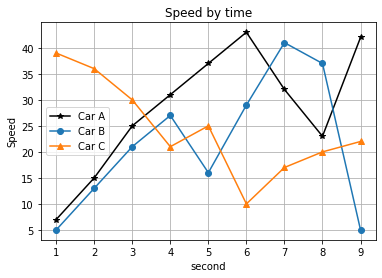

In [ ]:
# 아래는 판다스의 메서드이지만 맷플롯립을 기반으로 쓰는 것입니다.
# `style` 파라미터의 인자는 맷플롯립에서 사용하는 선 스타일과 동일하게 쓰입니다.
# 다만 일반 맷플롯립과는 달리 `색 선 마커` 형식으로 아래처럼 붙여서 한번에 지정합니다. 
speed_plot = df.plot(grid=True, style=['k-*', '-o', '-^'], title='Speed by time')
speed_plot.set_ylabel('Speed')

image_file = '/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/초별 속도.png'
plt.savefig(image_file, dpi=400)

plt.show()

판다스 `ExcelWriter()` 메서드로 `engine=xlsxwriter`를 사용하려면 따로 설치해야 합니다. [xlsxwriter](https://xlsxwriter.readthedocs.io/working_with_pandas.html)를 클릭하면 더 많은 설명을 볼 수 있습니다.

In [ ]:
pip install xlsxwriter

     |████████████████████████████████| 148 kB 4.1 MB/s 


In [ ]:
# 파일 경로와 파일명을 지정합니다.
excel_file = '/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/초별 속도.xlsx'

# `ExcelWriter()` 메서드를 객체로 생성합니다.
excel_writer = pd.ExcelWriter(excel_file, engine='xlsxwriter')

# 데이터프레임을 엑셀 형식으로 파일화합니다.
df.to_excel(excel_writer, index=True, sheet_name='sheet1')

# 워크시트를 객체화합니다.
worksheet = excel_writer.sheets['sheet1']

# `insert_image()` 메서드로 워크시트에 이미지를 넣습니다.
# '(11, 1, image_file, {'x_scale': 0.5, 'y_scale': 0.5})'도 가능합니다.
worksheet.insert_image('A11', image_file, {'x_scale': 0.5, 'y_scale': 0.5})

# 최종적으로 저장합니다.
excel_writer.save()

이번에는 엑셀 차트를 파이썬으로 만드는 방법을 설명하겠습니다.

지정할 수 있는 차트 유형은 아래와 같습니다. 더 자세한 설명은 [`add_chart()`](https://xlsxwriter.readthedocs.io/chart.html) 링크를 참고 바랍니다.

- `area`: 영역형

- `bar`: 가로 막대형

- `column`: 세로 막대형

- `line`: 꺾은 선형

- `pie`: 원형

- `doughtnut`: 도넛형

- `scatter`: 분산형

- `stock`: 주식형

- `radar`: 방사형

In [ ]:
# 먼저 `ExcelWriter()` 메서드의 객체를 만듭니다.
excel_file = '/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/초별 속도 차트.xlsx'
excel_writer = pd.ExcelWriter(excel_file, engine='xlsxwriter')

# 데이터프레임을 엑셀화합니다.
df.to_excel(excel_writer, index=True, sheet_name='sheet1')

# `excel_writer` 객체로 워크북 객체와 워크시트 객체를 만듭니다.
workbook = excel_writer.book
worksheet = excel_writer.sheets['sheet1']

# 차트 객체를 생성합니다. 타입은 선형입니다.
chart = workbook.add_chart({'type': 'line'})

# 차트 객체에 데이터를 적용합니다.
chart.add_series({'values': '=sheet1!$B$2:$B$10',
                  'categories': '=sheet1!$A$2:$A$10',
                  'name': '=sheet1!$B$1'})
chart.add_series({'values': '=sheet1!$C$2:$C$10',
                  'categories': '=sheet1!$B$2:$B$10',
                  'name': '=sheet1!$C$1'})
chart.add_series({'values': '=sheet1!$D$2:$D$10',
                  'categories': '=sheet1!$C$2:$C$10',
                  'name': '=sheet1!$D$1'})

# 차트명, 범례명을 지정합니다.
chart.set_title({'name': 'speed by time'})
chart.set_x_axis({'name': 'scond'})
chart.set_y_axis({'name': 'speed'})

# 워크시트에 차트를 삽입합니다.
worksheet.insert_chart('A11', chart)

excel_writer.save()

## **1.3. JSON**

### **1.3.1. JSON 기본 개념**

[**JSON(JavaScript Object Notation)**](http://www.json.org/json-ko.html/)은 웹 서버가 데이터를 요청한 클라이언트에게 데이터를 제공하도록 구조화된 텍스트 형식입니다. 대부분 프로그래밍 언어에서 사용할 수 있습니다. JSON에 대해 쉽게 설명하는 이 [링크](http://tcpschool.com/json/intro)를 참고하시기 바랍니다. 

아래에 간단한 JSON 형식을 예시하겠습니다.
```
{
    "성명": "이승원",
    "나이": 33,
    "신체정보": {
        "키": 177,
        "몸무게": "비밀",
        "허리둘레": "비밀",
        "지병": "없음"
    },
    "취미": [
        "음악 감상하기",
        "노래 부르기",
        "노닥거리기",
        "게임하기",
        "자전거 타기",
        "먹기",
        "등등"
    ],
    "자격사항": [
        {
        "cn": 1,
        "자격명": "정보처리기사"
        },
        {
        "cn": 2,
        "자격명": "물류관리사"
        }
    ]
}
```
데이터 집합 하나를 객체(Object)로 부르며 중괄호(`{}`)로 묶입니다. 이 객체 내에는 여러 쌍이 존재하는데 예를 들면 `"성명": "이승원"`과 `"나이": 33`과 같은 쌍이 존재합니다. 각 쌍은 쉼표(`,`)로 구분합니다. `"신체정보"`에는 여러 쌍으로 구성된 객체 하나가 존재합니다. `"취미"`에는 대괄호(`[]`)로 묶인 배열이 있는데 쌍 데이터가 아닌 단일값입니다. 물론 `"자격사항"`처럼 배열 내에 단일값이 아닌 여러 객체가 존재할 수도 있습니다. 

[JSON Viewer](http://jsonviewer.stack.hu/)를 활용하면 구성 요소를 알아보기 쉽습니다. 더불어 [JSONLint](http://jsonlint.com/)를 활용하면 JSON 데이터가 올바르게 구성되었는지 확인할 수 있습니다.

### **1.3.2. 데이터 타입 변환하기**

`json` 라이브러리를 사용하여 딕셔너리 타입인 파이썬 데이터를 JSON 데이터, 또는 그 반대로 변환할 수 있습니다. 위에서 예시한 JSON 데이터를 사용하겠습니다.

In [ ]:
import json

In [ ]:
dict_lsw = {
    "성명": "이승원",
    "나이": 33,
    "신체정보": {
        "키": 177,
        "몸무게": "비밀",
        "허리둘레": "비밀",
        "지병": "없음"
    },
    "취미": [
        "음악 감상하기",
        "노래 부르기",
        "노닥거리기",
        "게임하기",
        "자전거 타기",
        "먹기",
        "등등"
    ],
    "자격사항": [
        {
        "cn": 1,
        "자격명": "정보처리기사"
        },
        {
        "cn": 2,
        "자격명": "물류관리사"
        }
    ]
}

데이터 타입을 확인하겠습니다.

In [ ]:
type(dict_lsw)

dict

`json.dumps()` 메서드를 사용하여 dict 타입 데이터를 JSON 데이터로 변환하겠습니다.

In [ ]:
json_lsw = json.dumps(dict_lsw)
json_lsw

'{"\\uc131\\uba85": "\\uc774\\uc2b9\\uc6d0", "\\ub098\\uc774": 33, "\\uc2e0\\uccb4\\uc815\\ubcf4": {"\\ud0a4": 177, "\\ubab8\\ubb34\\uac8c": "\\ube44\\ubc00", "\\ud5c8\\ub9ac\\ub458\\ub808": "\\ube44\\ubc00", "\\uc9c0\\ubcd1": "\\uc5c6\\uc74c"}, "\\ucde8\\ubbf8": ["\\uc74c\\uc545 \\uac10\\uc0c1\\ud558\\uae30", "\\ub178\\ub798 \\ubd80\\ub974\\uae30", "\\ub178\\ub2e5\\uac70\\ub9ac\\uae30", "\\uac8c\\uc784\\ud558\\uae30", "\\uc790\\uc804\\uac70 \\ud0c0\\uae30", "\\uba39\\uae30", "\\ub4f1\\ub4f1"], "\\uc790\\uaca9\\uc0ac\\ud56d": [{"cn": 1, "\\uc790\\uaca9\\uba85": "\\uc815\\ubcf4\\ucc98\\ub9ac\\uae30\\uc0ac"}, {"cn": 2, "\\uc790\\uaca9\\uba85": "\\ubb3c\\ub958\\uad00\\ub9ac\\uc0ac"}]}'

데이터 타입을 확인하겠습니다.

In [ ]:
type(json_lsw)

str

`json_lsw` 객체에 저장된 데이터 타입은 문자열이며, 한글 대신 아스키코드로, 들여쓰기는 되지 않은 상태로 구성되어 있습니다. 한글과 들여쓰기를 적용하기 위해 매개변수(파라미터) 몇 가지를 추가하겠습니다. `indent`는 몇 칸만큼 들여쓸지 숫자를 인자로 전달하는 매개변수이며 기본값은 `None`입니다. `sort_keys`는 키를 기준으로 오름차순 정렬 여부를 지정하는 매개변수이며 기본값은 `False`입니다. `ensure_ascii`는 아스키코드로 출력할지 여부를 지정하는 매개변수이며 기본값은 `True`입니다. 

In [ ]:
json_lsw = json.dumps(dict_lsw, indent=3, sort_keys=False, ensure_ascii=False)
print(json_lsw)

{
   "성명": "이승원",
   "나이": 33,
   "신체정보": {
      "키": 177,
      "몸무게": "비밀",
      "허리둘레": "비밀",
      "지병": "없음"
   },
   "취미": [
      "음악 감상하기",
      "노래 부르기",
      "노닥거리기",
      "게임하기",
      "자전거 타기",
      "먹기",
      "등등"
   ],
   "자격사항": [
      {
         "cn": 1,
         "자격명": "정보처리기사"
      },
      {
         "cn": 2,
         "자격명": "물류관리사"
      }
   ]
}


이번에는 `json.loads()`를 사용하여 JSON 데이터를 dict 타입 데이터로 변환하겠습니다. 

In [ ]:
dict_lsw = json.loads(json_lsw)
dict_lsw

{'나이': 33,
 '성명': '이승원',
 '신체정보': {'몸무게': '비밀', '지병': '없음', '키': 177, '허리둘레': '비밀'},
 '자격사항': [{'cn': 1, '자격명': '정보처리기사'}, {'cn': 2, '자격명': '물류관리사'}],
 '취미': ['음악 감상하기', '노래 부르기', '노닥거리기', '게임하기', '자전거 타기', '먹기', '등등']}

타입을 확인하겠습니다.

In [ ]:
type(dict_lsw)

dict

### **1.3.3. 데이터 인덱싱 하기**

인덱싱 하는 방법은 동일합니다.

In [ ]:
dict_lsw['신체정보']['몸무게']

'비밀'

다만 딕셔너리 안의 리스트 안의 딕셔너리는 아래처럼 인덱싱 해야 합니다.

In [ ]:
dict_lsw['자격사항'][0]['자격명']

'정보처리기사'

### **1.3.4. 파일 읽기**

판다스의 `read_json()` 메서드로 JSON 데이터를 데이터프레임으로 읽겠습니다.

In [ ]:
file_path = '/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/5674-833_4th/part2/read_json_sample.json'
df_json = pd.read_json(file_path)
df_json

,name,year,developer,opensource
pandas,,2008,Wes Mckinneye,True
NumPy,,2006,Travis Oliphant,True
matplotlib,,2003,John D. Hunter,True


### **1.3.5. 파일 저장하기**

딕셔너리 타입인 파이썬 데이터를 JSON 데이터로 저장하겠습니다.

In [ ]:
json_data = {'name': ['Jerry', 'Riah', 'Paul'],
            'algol': ['A', 'A+', 'B'],
            'basic': ['C', 'B', 'B+'],
            'c++': ['B+', 'C', 'C+']}
df_json = pd.DataFrame(json_data)
df_json

,name,algol,basic,c++
0,Jerry,A,C,B+
1,Riah,A+,B,C
2,Paul,B,B+,C+


In [ ]:
df_json.set_index('name', inplace=True)
df_json

,algol,basic,c++
name,,,
Jerry,A,C,B+
Riah,A+,B,C
Paul,B,B+,C+


In [ ]:
df_json.to_json('/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/to_json.json')

## **1.4. XML**

### **1.4.1. XML 기본 개념**

[**XML(Extensible Markup Language)**](http://tcpschool.com/xml/intro)은 데이터를 저장하고 전달할 목적으로 만든 다목적 마크업 언어입니다. XML에 대하여 이해하려면 **HTML(HyperText Markup Language)** 언어에 대한 사전 지식이 필요합니다(**1.5.2.2. HTML 기본 개념** 파트를 참고하시기 바랍니다). XML은 JSON보다 이전에 나왔지만 여전히 자주 사용됩니다. 다만 아래에서 다룰 예정인 웹 API의 응답 데이터로는 JSON이 더 자주 사용됩니다.

아래는 XML 데이터의 예시입니다. JSON 데이터의 예시를 XML 데이터로 변환하겠습니다.

```
<?xml version="1.0" encoding="UTF-8" ?>
<지원자정보>
    <성명>이승원</성명>
    <나이>33</나이>
    <신체정보>
    <!--지병을 제외하면 전부 거짓말입니다.-->
        <키 unit="cm">177</키>
        <몸무게 unit="kg">70</몸무게>
        <허리둘레 unit="inch">34</허리둘레>
        <지병>없음</지병>
    </신체정보>
    <취미>음악 감상하기</취미>
    <취미>노래 부르기</취미>
    <취미>노닥거리기</취미>
    <취미>게임하기</취미>
    <취미>자전거 타기</취미>
    <취미>먹기</취미>
    <취미>등등</취미>
    <자격사항>
        <cn>1</cn>
        <자격명>정보처리기사</자격명>
    </자격사항>
    <자격사항>
        <cn>2</cn>
        <자격명>물류관리사</자격명>
    </자격사항>
</지원자정보>
```
`<?xml version="1.0" encoding="UTF-8" ?>`는 XML문을 선언하는 부분이며 XML 해석기가 참고하는 정보입니다.  `<!--지병을 제외하면 전부 거짓말입니다.-->` 부분은 주석입니다. 시작 태그와 끝 태그(`<성명></성명>`) 사이(`이승원`)는 요소(Element)입니다. `<키 unit="cm">`처럼 태그에 속성을 지정할 수 있습니다.

### **1.4.2. 데이터 타입 변환하기**

[`xmltodict`](https://pypi.org/project/xmltodict) 라이브러리를 사용하여 XML 데이터를 dict 타입 데이터로 변환할 수 있습니다. 

In [ ]:
pip install xmltodict

In [ ]:
import xmltodict

먼저 XML 데이터를 가진 객체를 생성하겠습니다.

In [ ]:
xml_lsw = '''<?xml version="1.0" encoding="UTF-8" ?>
<지원자정보>
    <성명>이승원</성명>
    <나이>33</나이>
    <신체정보>
    <!--지병을 제외하면 전부 거짓말입니다.-->
        <키 unit="cm">177</키>
        <몸무게 unit="kg">70</몸무게>
        <허리둘레 unit="inch">34</허리둘레>
        <지병>없음</지병>
    </신체정보>
    <취미>음악 감상하기</취미>
    <취미>노래 부르기</취미>
    <취미>노닥거리기</취미>
    <취미>게임하기</취미>
    <취미>자전거 타기</취미>
    <취미>먹기</취미>
    <취미>등등</취미>
    <자격사항>
        <cn>1</cn>
        <자격명>정보처리기사</자격명>
    </자격사항>
    <자격사항>
        <cn>2</cn>
        <자격명>물류관리사</자격명>
    </자격사항>
</지원자정보>'''
print(xml_lsw)

<?xml version="1.0" encoding="UTF-8" ?>
<지원자정보>
    <성명>이승원</성명>
    <나이>33</나이>
    <신체정보>
    <!--지병을 제외하면 전부 거짓말입니다.-->
        <키 unit="cm">177</키>
        <몸무게 unit="kg">70</몸무게>
        <허리둘레 unit="inch">34</허리둘레>
        <지병>없음</지병>
    </신체정보>
    <취미>음악 감상하기</취미>
    <취미>노래 부르기</취미>
    <취미>노닥거리기</취미>
    <취미>게임하기</취미>
    <취미>자전거 타기</취미>
    <취미>먹기</취미>
    <취미>등등</취미>
    <자격사항>
        <cn>1</cn>
        <자격명>정보처리기사</자격명>
    </자격사항>
    <자격사항>
        <cn>2</cn>
        <자격명>물류관리사</자격명>
    </자격사항>
</지원자정보>


`xmltodict.parse()` 메서드를 사용하여 XML 데이터를 dict 타입 데이터로 변환하겠습니다. 매개변수 `xml_attribs`는 dict 타입으로 변환할 때 xml 데이터의 속성(예컨대 `unit="cm"`)을 출력할지 여부를 결정합니다. 기본값은 `True`이며 태그의 속성과 문자열은 아래처럼 출력됩니다. `False`로 지정하면 속성은 출력되지 않습니다.

먼저 `False`로 지정하겠습니다.

In [ ]:
dict_lsw = xmltodict.parse(xml_lsw, xml_attribs=False)
dict_lsw

OrderedDict([('지원자정보',
              OrderedDict([('성명', '이승원'),
                           ('나이', '33'),
                           ('신체정보',
                            OrderedDict([('키', '177'),
                                         ('몸무게', '70'),
                                         ('허리둘레', '34'),
                                         ('지병', '없음')])),
                           ('취미',
                            ['음악 감상하기',
                             '노래 부르기',
                             '노닥거리기',
                             '게임하기',
                             '자전거 타기',
                             '먹기',
                             '등등']),
                           ('자격사항',
                            [OrderedDict([('cn', '1'), ('자격명', '정보처리기사')]),
                             OrderedDict([('cn', '2'),
                                          ('자격명', '물류관리사')])])]))])

`True`로 지정하겠습니다.

In [ ]:
dict_lsw = xmltodict.parse(xml_lsw, xml_attribs=True)
dict_lsw

OrderedDict([('지원자정보',
              OrderedDict([('성명', '이승원'),
                           ('나이', '33'),
                           ('신체정보',
                            OrderedDict([('키',
                                          OrderedDict([('@unit', 'cm'),
                                                       ('#text', '177')])),
                                         ('몸무게',
                                          OrderedDict([('@unit', 'kg'),
                                                       ('#text', '70')])),
                                         ('허리둘레',
                                          OrderedDict([('@unit', 'inch'),
                                                       ('#text', '34')])),
                                         ('지병', '없음')])),
                           ('취미',
                            ['음악 감상하기',
                             '노래 부르기',
                             '노닥거리기',
                             '게임하기',
                      

`키`, `몸무게`, `허리둘레`의 속성은 `'@unit'`, 문자열은 `'#text'` 형식으로 출력됐습니다. 

데이터 타입을 확인하겠습니다.

In [ ]:
type(dict_lsw)

collections.OrderedDict

`OrderedDict` 타입은 입력한 순서에 따라 순서를 취하는 dict 타입입니다.

### **1.4.3. 데이터 인덱싱 하기**

인덱싱 하는 방법은 동일합니다.

In [ ]:
dict_lsw['지원자정보']['성명']

'이승원'

In [ ]:
dict_lsw['지원자정보']['신체정보']

OrderedDict([('키', OrderedDict([('@unit', 'cm'), ('#text', '177')])),
             ('몸무게', OrderedDict([('@unit', 'kg'), ('#text', '70')])),
             ('허리둘레', OrderedDict([('@unit', 'inch'), ('#text', '34')])),
             ('지병', '없음')])

In [ ]:
dict_lsw['지원자정보']['신체정보']['키']

OrderedDict([('@unit', 'cm'), ('#text', '177')])

In [ ]:
dict_lsw['지원자정보']['신체정보']['키']['@unit']

'cm'

In [ ]:
dict_lsw['지원자정보']['신체정보']['키']['#text']

'177'

In [ ]:
dict_lsw['지원자정보']['취미']

['음악 감상하기', '노래 부르기', '노닥거리기', '게임하기', '자전거 타기', '먹기', '등등']

In [ ]:
dict_lsw['지원자정보']['취미'][1]

'노래 부르기'

In [ ]:
dict_lsw['지원자정보']['자격사항'][0]

OrderedDict([('cn', '1'), ('자격명', '정보처리기사')])

In [ ]:
dict_lsw['지원자정보']['자격사항'][0]['자격명']

'정보처리기사'

## **1.5. 웹**

### **1.5.1. 표 가져오기**

`read_html()` 메서드는 HTML 웹 페이지의 `<table>` 태그에서 표 형식 데이터를 데이터프레임으로 변환합니다. 이 표 데이터를 파싱(parsing) 하려면 HTML 웹 페이지 주소를 따옴표 안에 입력합니다. 아래에서 예시하겠습니다.

In [ ]:
url = '/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/5674-833_4th/part2/sample.html'
tables_html = pd.read_html(url)
# `read_html()` 메서드로 데이터프레임을 출력하면
# 여러 데이터프레임이 리스트에 담겨서 출력됩니다.
tables_html

[   Unnamed: 0  c0  c1  c2  c3
 0           0   0   1   4   7
 1           1   1   2   5   8
 2           2   2   3   6   9,
          name  year        developer  opensource
 0       NumPy  2006  Travis Oliphant        True
 1  matplotlib  2003   John D. Hunter        True
 2      pandas  2008    Wes Mckinneye        True]

표 개수를 확인하겠습니다.

In [ ]:
len(tables_html)

2

두 개의 표를 출력하겠습니다.

In [ ]:
print(tables_html[0])
print()
print(tables_html[1])

   Unnamed: 0  c0  c1  c2  c3
0           0   0   1   4   7
1           1   1   2   5   8
2           2   2   3   6   9

         name  year        developer  opensource
0       NumPy  2006  Travis Oliphant        True
1  matplotlib  2003   John D. Hunter        True
2      pandas  2008    Wes Mckinneye        True


이번에는 두 개의 표를 반복(iteration)하면서 출력하겠습니다.

In [ ]:
for i in range(len(tables_html)):
    print(f'{i+1}번째 데이터프레임')
    print(tables_html[i])
    print()

1번째 데이터프레임
   Unnamed: 0  c0  c1  c2  c3
0           0   0   1   4   7
1           1   1   2   5   8
2           2   2   3   6   9

2번째 데이터프레임
         name  year        developer  opensource
0       NumPy  2006  Travis Oliphant        True
1  matplotlib  2003   John D. Hunter        True
2      pandas  2008    Wes Mckinneye        True



이제 2번째 데이터프레임에 행 인덱스를 'name' 열로 지정하겠습니다.

In [ ]:
df_html = tables_html[1]
df_html.set_index(['name'], inplace=True)
print(df_html)

            year        developer  opensource
name                                         
NumPy       2006  Travis Oliphant        True
matplotlib  2003   John D. Hunter        True
pandas      2008    Wes Mckinneye        True


### **1.5.2. 웹 스크레이핑 하기**

기실 **웹 크롤링(Web crawling)**과 **웹 스크레이핑(Web scraping)**은 구분 없이 쓰이는 표현이지만 흔히 쓰이는 표현은 웹 크롤링입니다. 엄밀히 구분하자면 웹 크롤링은 사이트의 전체 코드를 긁어와서 복제하는 것을 의미하고, 웹 스크레이핑은 특정 데이터만 추출하는 것을 의미합니다. 다시 말하면 웹 크롤링으로 웹 정보를 탐색하고, 그 웹 정보 중에 원하는 정보만 웹 스크레이핑 하는 것입니다. 여기서는 웹 스크레이핑이라는 표현을 사용하겠습니다.

웹 스크레이핑을 할 때 몇 가지 주의할 사항이 있습니다.

- 특정한 사이트에 자주 접근하면 서버에 큰 부담을 줍니다. 이런 부담을 덜고자 사이트 대부분은 수 초에서 수십 초만큼 지나야 접근을 허용하도록 설정되어 있습니다. 이런 방침에 반하도록 접근을 시도하면 접근이 차단될 수 있습니다.

- 저작권을 침해하지 않도록 주의해야 합니다.

- 사이트 내용이 지속적으로 변할 수 있으므로 특정 웹 스크레이핑 작업에 적용하던 개별 코드를 지속적으로 살펴야 합니다.

#### **1.5.2.1. 사이트 접속 및 정보 검색하기**

`webbrowser` 모듈을 사용해서 특정 사이트에 접속할 수 있습니다. 단, 이 모듈은 로컬 환경(주피터 노트북, 파이참, VS)에서는 사용할 수 있으나, 코랩은 가상 환경이므로 정책상 사용할 수 없습니다. 코랩에서 브라우저를 제어하는 ​​유일한 방법은 아래 코드로 Javascript를 사용하는 것입니다.

In [ ]:
%%javascript
window.open("http://naver.com", '_blank');

<IPython.core.display.Javascript object>

사용할 수 없는 모듈이지만 일단 코드는 작성하겠습니다. 이 코드는 **데이터 분석을 위한 파이썬 철저 입문**에 있는 코드를 그대로 가져왔습니다. 정상적으로 작동하면 `True`가 출력되지만 코랩에서는 막혀있으므로 `False`가 뜹니다.

In [ ]:
import webbrowser as wb

url = 'www.google.com'
wb.open(url)

False

특정 검색어를 바로 검색하려면 아래 코드를 실행합니다. 다만 이 역시도 `False`가 출력됩니다.

In [ ]:
naver_search_url = 'http://search.naver.com/search.naver?query='
search_word = '파이썬'
url = naver_search_url + search_word

wb.open(url)

False

구글에서 검색하는 코드도 있습니다. 이 또한 `False`입니다.

In [ ]:
google_url = 'www.google.com/#q='
search_word = 'python'
url = google_url + search_word

wb.open(url)

False

여러 사이트에 접속하는 방법도 있습니다. 반복문을 사용합니다.

In [ ]:
urls = ['www.naver.com', 'www.daum.net', 'www.google.com']

for url in urls:
    wb.open_new(url)

여러 검색어를 한꺼번에 출력하는 방법은 아래와 같습니다.

In [ ]:
google_url = 'www.google.com/#q='
search_words = ['python web scraping', 'python webbrowser']

for search_word in search_words:
    wb.open_new(google_url+search_word)

#### **1.5.2.2. HTML 기본 개념**

웹 스크레이핑을 하려면 먼저 웹 페이지를 구성하는 언어인 **HTML**에 대한 사전 지식을 갖춰야 합니다. 자세한 내용은 [링크1](http://tcpschool.com/html/intro)과 [링크2](https://velog.io/@ljinsk3/HTML-%EA%B8%B0%EC%B4%88-%EB%82%B4%EC%9A%A9-%EC%A0%95%EB%A6%AC#1-html-basic-tags-useful)를 참고 바랍니다.

- **HTML(HyperText Markup Language)**: 웹 페이지를 구조적으로 구성하는 언어입니다.

- **HTTP(HyperText Transfer Protocol)**: HTML 문서가 가진 정보를 교환하도록 생성한 전송 규약(프로토콜)입니다.

- **Web Page**: HTML로 구성된 웹상의 개별 문서입니다. 여러 웹 페이지로 웹 사이트 하나를 구성합니다.

- **클라이언트(Client)**: 컴퓨터, 스마트폰 등 웹 사이트에 접속하는 기기입니다.

- **서버(Server, Web Server)**: 웹 사이트를 운영하는 시스템입니다.

위 용어들을 토대로 정보가 오고 가는 과정을 쉽게 설명하겠습니다.

1. 클라이언트가 웹 브라우저로 서버에 접속합니다.

2. HTTP 형식으로 특정 정보를 요청(Request)합니다. 

3. 서버는 HTTP 형식으로 응답(Respond)하여 특정 정보를 담은 HTML 파일을 전송합니다.

4. HTML 파일을 전송 받은 클라이언트의 웹 브라우저는 이를 해석하여 사용자가 알아보기 좋은 형태로 변환합니다.

HTML 기본 구조에 대해 설명하겠습니다. 자세한 설명은 아니지만 웹 스크레이핑에 필수적인 요소만 살피겠습니다. 더 자세한 내용은 구글(구교수)과 함께 하시기 바랍니다.

- **태그(Tag)**: `<>`로 이루어진 부분입니다. **시작 태그**와 **끝 태그**(`/`가 먼저 위치한 태그)로 나뉩니다.

- **속성(Attribute)**: 시작 태그 안에 부가적인 정보를 제공합니다.

- **요소(Element)**: 시작 태그와 끝 태그, 이 둘의 안에 포함된 내용 전체를 의미합니다.

아래 코드는 기본적인 예제입니다. 주석으로 설명을 보태겠습니다. 실제로 파일을 실행시킬 땐 주석 부분을 지워야 출력 화면에 주석이 표시되지 않습니다. HTML의 주석은 `<!-- 내용 -->` 형식입니다.

In [ ]:
# 마술명령어로 HTML 코드를 저장합니다.
%%writefile /content/gdrive/MyDrive/Python_for_Data_Analytics_Science/HTML_ex.html

# HTML을 명시하는 DTD(Document Type Definition)입니다.
# HTMl 문서라고 선언하는 것입니다.
<!doctype html>

<html>
    <head>
        <meta charset='utf-8'>
        <title>식재료 정보</title>
    </head>
    <body>
        <h1>식재료 정보</h1>
        # `id=''`라는 태그 속성 없이 `<p>`로만 작성해도 출력됩니다.
        # 다만 이 태그 속성은 웹 페이지에서 특정한 정보를 추출하는 데 중요한 정보입니다.
        # 이 속성을 통해 데이터를 쉽게 얻을 수 있습니다.
        <p id='ingredient'>취나물</p>
        <p id='origin'>충북</p>
        <p id='farmer'>이승원</p>
        <p id='date'>2021년 10월 31일</p>
    </body>
</html>

Overwriting /content/gdrive/MyDrive/Python_for_Data_Analytics_Science/HTML_ex.html


#### **1.5.2.3. 웹스크레이핑 관련 모듈 활용하기**

파이썬으로 웹 페이지 소스 코드를 가져오려면 [`request`](http://docs.python-requests.org/en/latest/) 모듈의 `get()` 메서드를 사용합니다. 

In [ ]:
r = requests.get('http://www.daum.net')
r

<Response [200]>

`r.text[]` 형식으로 소스 코드를 출력할 수 있습니다. 소스 코드 길이가 매우 기므로 299번째 텍스트까지만 출력하겠습니다.

In [ ]:
r.text[0:300]

'<!DOCTYPE html>\n<html lang="ko" class="">\n<head>\n<meta charset="utf-8"/>\n<meta http-equiv="x-ua-compatible" content="IE=edge" />\n<title>Daum</title>\n<meta property="og:url" content="https://www.daum.net/">\n<meta property="og:type" content="website">\n<meta property="og:title" content="Daum">\n<meta pr'

위 과정을 한꺼번에 수행할 수 있습니다.

In [ ]:
html = requests.get('http://www.daum.net').text
html[0:300]

'<!DOCTYPE html>\n<html lang="ko" class="">\n<head>\n<meta charset="utf-8"/>\n<meta http-equiv="x-ua-compatible" content="IE=edge" />\n<title>Daum</title>\n<meta property="og:url" content="https://www.daum.net/">\n<meta property="og:type" content="website">\n<meta property="og:title" content="Daum">\n<meta pr'

가져온 HTML 코드를 분석하려면 파싱(Parsing) 작업을 거쳐야 합니다. 파싱이란 특정 요소별로 HTML 코드를 분류하는 것을 의미합니다. 여기서 [`BeautifulSoup`](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) 모듈을 사용하면 파싱 작업을 수월하게 수행할 수 있습니다. 

In [ ]:
html = '''<html><body><div><span>\
<a href=http://www.daum.net>daum</a>\
<a href=http://www.nate.com>naver</a>\
<a href=http://www.google.com>google</a>\
</span></div></body></html>'''

# 'lxml은 HTML 소스를 파싱하는 파서(Parser)입니다.
soup = BeautifulSoup(html, 'lxml')
# 깔끔하게 출력하기 위해 `prettify()` 메서드를 사용합니다.
print(soup.prettify())

<html>
 <body>
  <div>
   <span>
    <a href="http://www.daum.net">
     daum
    </a>
    <a href="http://www.nate.com">
     naver
    </a>
    <a href="http://www.google.com">
     google
    </a>
   </span>
  </div>
 </body>
</html>


첫 태그의 첫 요소를 찾겠습니다.

In [ ]:
soup.find('a')

<a href="http://www.daum.net">daum</a>

태그의 텍스트만 추출하겠습니다.

In [ ]:
soup.find('a').get_text()

'daum'

모든 태그의 요소를 찾겠습니다.

In [ ]:
soup.find_all('a')

[<a href="http://www.daum.net">daum</a>,
 <a href="http://www.nate.com">naver</a>,
 <a href="http://www.google.com">google</a>]

모든 태그의 텍스트를 추출하겠습니다. 참고로 `get_text()` 메서드는 단일값에만 적용할 수 있고 리스트 형태에는 적용할 수 없습니다. 반복문으로 하나씩 적용해야 합니다.

In [ ]:
site_names = soup.find_all('a')
for site_name in site_names:
    print(site_name.get_text())

daum
naver
google


다른 예시를 통해 설명을 이어가겠습니다. 새로운 HTML문 객체를 생성하겠습니다.

In [ ]:
html2 = '''
<html>
    <head>
        <meta charset='utf-8'>
        <title>식재료 정보</title>
    </head>
    <body>
        <h1>식재료 정보</h1>
        <p id='ingredient'>취나물</p>
        <p id='origin'>충북</p>
        <p id='farmer'>이승원</p>
        <p id='date'>2021년 10월 31일</p>

        <p id='ingredient'>콩나물</p>
        <p id='origin'>서울</p>
        <p id='farmer'>이순신</p>
        <p id='date'>2021년 11월 1일</p>
    </body>
</html>
'''

soup2 = BeautifulSoup(html2, 'lxml')

아래처럼 원하는 요소만 가져올 수 있습니다.

In [ ]:
print(soup2.title)
print()
print(soup2.body)
print()
print(soup2.body.h1)

<title>식재료 정보</title>

<body>
<h1>식재료 정보</h1>
<p id="ingredient">취나물</p>
<p id="origin">충북</p>
<p id="farmer">이승원</p>
<p id="date">2021년 10월 31일</p>
<p id="ingredient">콩나물</p>
<p id="origin">서울</p>
<p id="farmer">이순신</p>
<p id="date">2021년 11월 1일</p>
</body>

<h1>식재료 정보</h1>


In [ ]:
print(soup2.find('p', {'id': 'origin'}))
print()
print(soup2.find_all('p', {'id': 'origin'}))

<p id="origin">충북</p>

[<p id="origin">충북</p>, <p id="origin">서울</p>]


원하는 요소를 텍스트로 가져올 수 있습니다. 방식은 위에서 반복문으로 예시한 내용과 같습니다.

In [ ]:
farmers = soup2.find_all('p', {'id': 'farmer'})
origins = soup2.find_all('p', {'id': 'origin'})
for farmer, origin in zip(farmers, origins):
    print(farmer.get_text() + ':' + origin.get_text())

이승원:충북
이순신:서울


**CSS(Cascading Style Sheets)** 선택자(Selector)를 사용하여 요소를 찾을 수도 있습니다.CSS는 시각적으로 스타일을 꾸밀 목적으로 사용하는 언어입니다. 주로 HTML과 함께 사용하여 웹 페이지를 구성합니다. HTML는 웹 페이지 구조를 잡는 데 쓰이고, CSS는 객체의 글꼴, 배경색, 크기 등 여러 스타일을 잡는 데 쓰입니다.

아래에서 예시하겠습니다. `select()` 메서드에 대한 설명은 아래에서 지속하겠습니다.

In [ ]:
soup2.select('body h1')

[<h1>식재료 정보</h1>]

In [ ]:
# `p`는 `body`에만 위치하므로 `body`를 생략하고 `p`만 선언해도 됩니다. 
soup2.select('body p')

[<p id="ingredient">취나물</p>,
 <p id="origin">충북</p>,
 <p id="farmer">이승원</p>,
 <p id="date">2021년 10월 31일</p>,
 <p id="ingredient">콩나물</p>,
 <p id="origin">서울</p>,
 <p id="farmer">이순신</p>,
 <p id="date">2021년 11월 1일</p>]

`select()` 메서드에 태그 내 속성과 속성값을 지정하여 요소를 추출할 수 있습니다. 지정하는 형식은 아래와 같습니다. class라면 `태그.class의 속성값` 형식을 취하고, id라면 `태그#id의 속성값` 형식을 취합니다. 자세한 설명은 [링크](https://pythonblog.co.kr/coding/11/)를 참고하시기 바랍니다.

먼저 클래스 속성을 추가한 HTML 소스를 생성하고 구글 드라이브에 저장하겠습니다.

In [ ]:
%%writefile /content/gdrive/MyDrive/Python_for_Data_Analytics_Science/HTML_ex2.html
<!doctype html>
<html>
    <head>
        <meta charset='utf-8'>
        <title>식재료 정보</title>
    </head>
    <body>
        <p id='title'><b>취나물</b></p>
        <p id='info_list'>취나물 정보를 담은 페이지 목록입니다.</p>
        <a href='https://terms.naver.com/entry.naver?docId=1993522&cid=48180&categoryId=48248' 
        class='portal' id='naver'>네이버</a><br>
        <a href='https://100.daum.net/encyclopedia/view/68XX12300146' 
        class='portal' id='daum'>다음</a><br>
        <a href='https://ko.wikipedia.org/wiki/%EC%B7%A8%EB%82%98%EB%AC%BC' 
        class='encyclopedia' id='wiki'>위키백과</a>
    </body>
</html>

Overwriting /content/gdrive/MyDrive/Python_for_Data_Analytics_Science/HTML_ex2.html


저장한 파일을 변수에 할당하겠습니다.

In [ ]:
with open('/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/HTML_ex2.html', encoding='utf-8') as f:
    html3 = f.read()

soup3 = BeautifulSoup(html3, 'lxml')
print(soup3.prettify())

<!DOCTYPE html>
<html>
 <head>
  <meta charset="utf-8"/>
  <title>
   식재료 정보
  </title>
 </head>
 <body>
  <p id="title">
   <b>
    취나물
   </b>
  </p>
  <p id="info_list">
   취나물 정보를 담은 페이지 목록입니다.
  </p>
  <a class="portal" href="https://terms.naver.com/entry.naver?docId=1993522&amp;cid=48180&amp;categoryId=48248" id="naver">
   네이버
  </a>
  <br/>
  <a class="portal" href="https://100.daum.net/encyclopedia/view/68XX12300146" id="daum">
   다음
  </a>
  <br/>
  <a class="encyclopedia" href="https://ko.wikipedia.org/wiki/%EC%B7%A8%EB%82%98%EB%AC%BC" id="wiki">
   위키백과
  </a>
 </body>
</html>


요소를 추출하겠습니다.

In [ ]:
soup3.select('p')

[<p id="title"><b>취나물</b></p>, <p id="info_list">취나물 정보를 담은 페이지 목록입니다.</p>]

In [ ]:
soup3.select('p#title')

[<p id="title"><b>취나물</b></p>]

In [ ]:
soup3.select('a')

[<a class="portal" href="https://terms.naver.com/entry.naver?docId=1993522&amp;cid=48180&amp;categoryId=48248" id="naver">네이버</a>,
 <a class="portal" href="https://100.daum.net/encyclopedia/view/68XX12300146" id="daum">다음</a>,
 <a class="encyclopedia" href="https://ko.wikipedia.org/wiki/%EC%B7%A8%EB%82%98%EB%AC%BC" id="wiki">위키백과</a>]

In [ ]:
soup3.select('a.portal')

[<a class="portal" href="https://terms.naver.com/entry.naver?docId=1993522&amp;cid=48180&amp;categoryId=48248" id="naver">네이버</a>,
 <a class="portal" href="https://100.daum.net/encyclopedia/view/68XX12300146" id="daum">다음</a>]

In [ ]:
soup3.select('a#daum')

[<a class="portal" href="https://100.daum.net/encyclopedia/view/68XX12300146" id="daum">다음</a>]

In [ ]:
info_list = soup3.select('a')
for info in info_list:
    print(info.get_text())

네이버
다음
위키백과


줄 바꿈 기능을 활용하여 가독성을 제고할 수 있습니다. 먼저 새로운 HTML 파일을 생성하겠습니다. `</br>`은 줄바꿈을 의미합니다.

In [ ]:
%%writefile /content/gdrive/MyDrive/Python_for_Data_Analytics_Science/HTML_ex3.html

<!doctype html>
<html>
    <head>
        <meta charset='utf-8'>
        <title>누구나 꼰대일 수 있다.</title>
    </head>
    <body>
        <p id='title'><b>꼰대란 무엇인가</b></p>
        <p id='explanation'>1. 자신의 경험을 일반화해서 남에게 일방적으로 강요한다.<br/>2. 자신의 생각과 주장이 항상 옳다고 생각한다.<br/>3. 지위가 낮거나 나이가 어린 사람에게 귄위적으로 행동한다.<br/>4. 갑질을 습관적으로 행한다.<br/>5. 사적인 질문을 서슴없이 한다.</p>
        <p id='title'><b>꼰대에서 탈출하는 법</b></p>
        <p id='explanation'>1. 내 인생과 상대의 인생은 엄연히 다르므로 어떤 주제든 일반화하지 않는다.<br/>2. 내 생각과 주장이 항상 옳지 않을 수 있다는 가치관을 갖는다.<br/>3. 권위를 버리고 존중하며 소통하는 습관을 갖는다.<br/>4. 사적인 질문을 하지 않는다.<br/>5. 추억팔이를 하지 않는다.<br/>6. 말하기보다 많이 듣는다.<br/>7. 조언 대신 공감한다.<br/>8. 말 대신 먼저 행동한다.</p>
    </body>
</html>

Overwriting /content/gdrive/MyDrive/Python_for_Data_Analytics_Science/HTML_ex3.html


HTML문을 읽고 객체에 할당하겠습니다.

In [ ]:
with open('/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/HTML_ex3.html',
          encoding='utf-8') as f:
    html4 = f.read()

soup4 = BeautifulSoup(html4, 'lxml')
print(soup4.prettify())

<!DOCTYPE html>
<html>
 <head>
  <meta charset="utf-8"/>
  <title>
   누구나 꼰대일 수 있다.
  </title>
 </head>
 <body>
  <p id="title">
   <b>
    꼰대란 무엇인가
   </b>
  </p>
  <p id="explanation">
   1. 자신의 경험을 일반화해서 남에게 일방적으로 강요한다.
   <br/>
   2. 자신의 생각과 주장이 항상 옳다고 생각한다.
   <br/>
   3. 지위가 낮거나 나이가 어린 사람에게 귄위적으로 행동한다.
   <br/>
   4. 갑질을 습관적으로 행한다.
   <br/>
   5. 사적인 질문을 서슴없이 한다.
  </p>
  <p id="title">
   <b>
    꼰대에서 탈출하는 법
   </b>
  </p>
  <p id="explanation">
   1. 내 인생과 상대의 인생은 엄연히 다르므로 어떤 주제든 일반화하지 않는다.
   <br/>
   2. 내 생각과 주장이 항상 옳지 않을 수 있다는 가치관을 갖는다.
   <br/>
   3. 권위를 버리고 존중하며 소통하는 습관을 갖는다.
   <br/>
   4. 사적인 질문을 하지 않는다.
   <br/>
   5. 추억팔이를 하지 않는다.
   <br/>
   6. 말하기보다 많이 듣는다.
   <br/>
   7. 조언 대신 공감한다.
   <br/>
   8. 말 대신 먼저 행동한다.
  </p>
 </body>
</html>


요소를 찾아서 객체에 할당하고 텍스트만 출력하겠습니다.

In [ ]:
title = soup4.find('p', {'id': 'title'})
explanations = soup4.find_all('p', {'id': 'explanation'})

print(title.get_text())
for explanation in explanations:
    print(explanation.get_text())

꼰대란 무엇인가
1. 자신의 경험을 일반화해서 남에게 일방적으로 강요한다.2. 자신의 생각과 주장이 항상 옳다고 생각한다.3. 지위가 낮거나 나이가 어린 사람에게 귄위적으로 행동한다.4. 갑질을 습관적으로 행한다.5. 사적인 질문을 서슴없이 한다.
1. 내 인생과 상대의 인생은 엄연히 다르므로 어떤 주제든 일반화하지 않는다.2. 내 생각과 주장이 항상 옳지 않을 수 있다는 가치관을 갖는다.3. 권위를 버리고 존중하며 소통하는 습관을 갖는다.4. 사적인 질문을 하지 않는다.5. 추억팔이를 하지 않는다.6. 말하기보다 많이 듣는다.7. 조언 대신 공감한다.8. 말 대신 먼저 행동한다.


`</br>`로 지정했던 줄바꿈이 적용되지 않고 그대로 출력됐습니다. `replace_with()` 메서드를 활용하여 기존 태그나 문자열을 변경할 수 있습니다. 여기서는 `</br>` 태그를 `/n`으로 바꿀 필요가 있습니다.

먼저 예시 차원에서 `soup4` 객체에 `find()` 메서드를 적용하여 `explanation1` 객체에 할당하겠습니다. 위에서 예시한 방법과 다른 점은 없습니다.

In [ ]:
soup4 = BeautifulSoup(html4, 'lxml')
explanation1 = soup4.find('p', {'id': 'explanation'})
print(explanation1)

<p id="explanation">1. 자신의 경험을 일반화해서 남에게 일방적으로 강요한다.<br/>2. 자신의 생각과 주장이 항상 옳다고 생각한다.<br/>3. 지위가 낮거나 나이가 어린 사람에게 귄위적으로 행동한다.<br/>4. 갑질을 습관적으로 행한다.<br/>5. 사적인 질문을 서슴없이 한다.</p>


`find()` 메서드를 사용했으므로 첫 번째 'explanation'만 출력됐습니다. `<br/>` 태그를 찾겠습니다.

In [ ]:
explanation_br = explanation1.find('br')
print(explanation_br)

<br/>


`find()` 메서드를 사용했으므로 여러 `<br/>` 태그 중에 하나만 출력됐습니다. 일단 `<br/>` 태그를 `\n`으로 바꾸겠습니다.

In [ ]:
explanation_br.replace_with('\n')
print(explanation1)

<p id="explanation">1. 자신의 경험을 일반화해서 남에게 일방적으로 강요한다.
2. 자신의 생각과 주장이 항상 옳다고 생각한다.<br/>3. 지위가 낮거나 나이가 어린 사람에게 귄위적으로 행동한다.<br/>4. 갑질을 습관적으로 행한다.<br/>5. 사적인 질문을 서슴없이 한다.</p>


태그가 하나만 출력됐으므로 개행문자로 바뀐 태그는 하나뿐입니다. 전체 태그를 바꾸겠습니다.

In [ ]:
explanation_br = explanation1.find_all('br')

for br in explanation_br:
    br.replace_with('\n')
print(explanation1)

<p id="explanation">1. 자신의 경험을 일반화해서 남에게 일방적으로 강요한다.
2. 자신의 생각과 주장이 항상 옳다고 생각한다.
3. 지위가 낮거나 나이가 어린 사람에게 귄위적으로 행동한다.
4. 갑질을 습관적으로 행한다.
5. 사적인 질문을 서슴없이 한다.</p>


위와 같이 `<br/>` 태그 전체를 개행문자로 바꾸는 기능을 함수로 생성하겠습니다.

In [ ]:
def br_to_n(soup_html):
    brs = soup_html.find_all('br')
    for br in brs:
        br.replace_with('\n')
    return soup_html

생성한 `br_to_n` 함수를 적용해서 모든 `<br/>` 태그를 바꾸겠습니다.

In [ ]:
br_to_n(soup4)

<!DOCTYPE html>
<html>
<head>
<meta charset="utf-8"/>
<title>누구나 꼰대일 수 있다.</title>
</head>
<body>
<p id="title"><b>꼰대란 무엇인가</b></p>
<p id="explanation">1. 자신의 경험을 일반화해서 남에게 일방적으로 강요한다.
2. 자신의 생각과 주장이 항상 옳다고 생각한다.
3. 지위가 낮거나 나이가 어린 사람에게 귄위적으로 행동한다.
4. 갑질을 습관적으로 행한다.
5. 사적인 질문을 서슴없이 한다.</p>
<p id="title"><b>꼰대에서 탈출하는 법</b></p>
<p id="explanation">1. 내 인생과 상대의 인생은 엄연히 다르므로 어떤 주제든 일반화하지 않는다.
2. 내 생각과 주장이 항상 옳지 않을 수 있다는 가치관을 갖는다.
3. 권위를 버리고 존중하며 소통하는 습관을 갖는다.
4. 사적인 질문을 하지 않는다.
5. 추억팔이를 하지 않는다.
6. 말하기보다 많이 듣는다.
7. 조언 대신 공감한다.
8. 말 대신 먼저 행동한다.</p>
</body>
</html>

텍스트만 모아서 출력하겠습니다.

In [ ]:
titles = soup4.find_all('p', {'id': 'title'})
explanations = soup4.find_all('p', {'id': 'explanation'})

for title, explanation in zip(titles, explanations):
    print(title.get_text())
    print()
    explanation_n = br_to_n(explanation)
    print(explanation_n.get_text())
    print()

꼰대란 무엇인가

1. 자신의 경험을 일반화해서 남에게 일방적으로 강요한다.
2. 자신의 생각과 주장이 항상 옳다고 생각한다.
3. 지위가 낮거나 나이가 어린 사람에게 귄위적으로 행동한다.
4. 갑질을 습관적으로 행한다.
5. 사적인 질문을 서슴없이 한다.

꼰대에서 탈출하는 법

1. 내 인생과 상대의 인생은 엄연히 다르므로 어떤 주제든 일반화하지 않는다.
2. 내 생각과 주장이 항상 옳지 않을 수 있다는 가치관을 갖는다.
3. 권위를 버리고 존중하며 소통하는 습관을 갖는다.
4. 사적인 질문을 하지 않는다.
5. 추억팔이를 하지 않는다.
6. 말하기보다 많이 듣는다.
7. 조언 대신 공감한다.
8. 말 대신 먼저 행동한다.



#### **1.5.2.4. 예제**

**데이터 분석을 위한 파이썬 철저 입문(최은석, 위키북스)**를 참고하여 웹 스크레이핑을 시도하겠습니다.

먼저 웹 사이트 순위를 목록화한 [알렉사](https://www.alexa.com/topsites/countries/KR) 사이트에서 한국 웹 사이트 순위 목록을 가져오겠습니다.

순위 목록 중에 'Google.com'을 검사하면 `<p>` 태그 내에 `<a>`로 이뤄져 있습니다. 그 아래 사이트들도 동일한 스타일로 구성되어 있습니다. `BeautifulSoup` 모듈의 `select()` 메서드를 활용해서 해당하는 요소만 출력해야 합니다. 인자는 `p a`로 전달합니다.

일단 HTML 문을 가져오고, 순위 목록을 가져오겠습니다.

In [ ]:
url = 'https://www.alexa.com/topsites/countries/KR'
# `request.get()` 형식으로 해당 주소의 HTML을 가져옵니다.
html_website_ranking = requests.get(url).text
soup_website_ranking = BeautifulSoup(html_website_ranking, 'lxml')

# 'p' 태그의 요소 내에서 a 태그의 요소를 찾습니다.
website_ranking = soup_website_ranking.select('p a')
len(website_ranking)

51

In [ ]:
website_ranking[:5]

[<a href="https://support.alexa.com/hc/en-us/articles/200444340" target="_blank">this explanation</a>,
 <a href="/siteinfo/google.com">Google.com</a>,
 <a href="/siteinfo/naver.com">Naver.com</a>,
 <a href="/siteinfo/youtube.com">Youtube.com</a>,
 <a href="/siteinfo/daum.net">Daum.net</a>]

출력 결과를 보면 총 51개 항목으로 이뤄진 리스트입니다. 첫 번째 항목은 사이트 항목이 아닙니다. 두 번째 항목부터 51번째 항목까지 사이트입니다. 따라서 첫 번째 항목만 제외하고 마지막 항목까지 선택해서 활용해야 합니다.

위에서 강조했듯이 `get_text()` 메서드는 단일값에만 적용할 수 있습니다. 리스트 형태에는 적용할 수 없습니다. 반복문을 통해 하나씩 적용해야 합니다.

In [ ]:
# 리스트 컴프리헨션을 활용합니다.
website_ranking_address = [website_ranking_element.get_text() for website_ranking_element in website_ranking[1:]]
website_ranking_address[:5]

['Google.com', 'Naver.com', 'Youtube.com', 'Daum.net', 'Tistory.com']

In [ ]:
for i in range(10):
    print(f'{i+1}위: {website_ranking_address[i]}')

1위: Google.com
2위: Naver.com
3위: Youtube.com
4위: Daum.net
5위: Tistory.com
6위: Kakao.com
7위: Tmall.com
8위: Coupang.com
9위: Google.co.kr
10위: Amazon.com


데이터프레임으로 만들겠습니다.

In [ ]:
dict_website_ranking = {'website': website_ranking_address}
index = range(1, len(website_ranking_address)+1)
df = pd.DataFrame(dict_website_ranking, index=index)
df[:5]

,website
1,Google.com
2,Naver.com
3,Youtube.com
4,Daum.net
5,Tistory.com


이번에는 음악 사이트 멜론(melon)에서 실시간 음악 순위를 가져오겠습니다. 

In [ ]:
url = 'https://www.melon.com/chart/index.htm'
html = requests.get(url).text
soup = BeautifulSoup(html, 'lxml')
soup

아무것도 출력되지 않습니다. 무분별한 접근을 막기 위한 조치로 사료합니다. 취할 수 있는 조치는 헤더에 컴퓨터가 아닌 사용자라는 사실을 전달하는 것입니다. 자신의 헤더 확인 주소인 'm.avalon.co.kr/check.html'를 직접 주소창에 붙여넣고 접속합니다. 사용 중인 브라우저에 해당하는 헤더를 복사하고 아래 코드로 지정합니다.

In [ ]:
header = {'User-Agent': 'Chrome/95.0.4638.54'}
html = requests.get(url, headers=header).text
soup = BeautifulSoup(html, 'lxml')
# `soup` 객체에 담긴 내용이 많으므로 출력하지 않겠습니다.

곡명을 가져오겠습니다. 두 가지 방법이 있습니다. `select()` 메서드를 사용하는 방법과 `find_all()` 메서드를 사용하는 방법입니다.

먼저 `select()` 메서드를 사용하겠습니다. 곡명은 `<div>` 태그의 `class`가 `ellipsis rank01`인 부분입니다. 주목할 부분이라면 `ellipsis rank01`은 띄어쓰기가 있으므로 메서드가 제대로 인식되지 않습니다. 띄어쓰기 대신 `.`을 사용하면 `ellipsis rank01`로 인식됩니다.

In [ ]:
titles = soup.select('div.ellipsis.rank01')
titles[:5]

[<div class="ellipsis rank01"><span>
 <a href="javascript:melon.play.playSong('1000002721',34215822);" title="쉬어 (Feat. MINO) (Prod. GRAY) 재생">쉬어 (Feat. MINO) (Prod. GRAY)</a>
 </span></div>, <div class="ellipsis rank01"><span>
 <a href="javascript:melon.play.playSong('1000002721',34101563);" title="strawberry moon 재생">strawberry moon</a>
 </span></div>, <div class="ellipsis rank01"><span>
 <a href="javascript:melon.play.playSong('1000002721',34215821);" title="Wake Up (Prod. 코드 쿤스트) 재생">Wake Up (Prod. 코드 쿤스트)</a>
 </span></div>, <div class="ellipsis rank01"><span>
 <a href="javascript:melon.play.playSong('1000002721',34041584);" title="Savage 재생">Savage</a>
 </span></div>, <div class="ellipsis rank01"><span>
 <a href="javascript:melon.play.playSong('1000002721',34061322);" title="사랑은 늘 도망가 재생">사랑은 늘 도망가</a>
 </span></div>]

다음은 `find_all()` 메서드를 사용하는 방법입니다. 상황에 맞게 적당한 메서드를 골라서 사용하면 됩니다.

In [ ]:
titles = soup.find_all('div', {'class': 'ellipsis rank01'})
titles[:5]

[<div class="ellipsis rank01"><span>
 <a href="javascript:melon.play.playSong('1000002721',34215822);" title="쉬어 (Feat. MINO) (Prod. GRAY) 재생">쉬어 (Feat. MINO) (Prod. GRAY)</a>
 </span></div>, <div class="ellipsis rank01"><span>
 <a href="javascript:melon.play.playSong('1000002721',34101563);" title="strawberry moon 재생">strawberry moon</a>
 </span></div>, <div class="ellipsis rank01"><span>
 <a href="javascript:melon.play.playSong('1000002721',34215821);" title="Wake Up (Prod. 코드 쿤스트) 재생">Wake Up (Prod. 코드 쿤스트)</a>
 </span></div>, <div class="ellipsis rank01"><span>
 <a href="javascript:melon.play.playSong('1000002721',34041584);" title="Savage 재생">Savage</a>
 </span></div>, <div class="ellipsis rank01"><span>
 <a href="javascript:melon.play.playSong('1000002721',34061322);" title="사랑은 늘 도망가 재생">사랑은 늘 도망가</a>
 </span></div>]

위에서 `get_text()` 메서드는 리스트에 적용되지 않는다고 설명했습니다. 반복문을 활용하여 항목을 하나씩 적용해야 합니다.

In [ ]:
for title in titles[:5]:
    print(title.find('a').get_text())

쉬어 (Feat. MINO) (Prod. GRAY)
strawberry moon
Wake Up (Prod. 코드 쿤스트)
Savage
사랑은 늘 도망가


리스트 컴프리헨션으로도 적용할 수 있습니다. 개행문자 `\n`이 곡명의 양쪽에 붙어서 출력되므로 `replace()` 메서드를 사용하여 제거하겠습니다.

In [ ]:
titles_lc = [title.get_text() for title in titles]
titles_lc[:5]

['\n쉬어 (Feat. MINO) (Prod. GRAY)\n',
 '\nstrawberry moon\n',
 '\nWake Up (Prod. 코드 쿤스트)\n',
 '\nSavage\n',
 '\n사랑은 늘 도망가\n']

In [ ]:
titles_lc = [title.get_text().replace('\n', '') for title in titles]
for title in titles_lc[:5]:
    print(title)

쉬어 (Feat. MINO) (Prod. GRAY)
strawberry moon
Wake Up (Prod. 코드 쿤스트)
Savage
사랑은 늘 도망가


`strip()` 메서드를 사용해도 같습니다.

In [ ]:
titles_lc = [title.get_text().strip() for title in titles]
for title in titles_lc[:5]:
    print(title)

쉬어 (Feat. MINO) (Prod. GRAY)
strawberry moon
Wake Up (Prod. 코드 쿤스트)
Savage
사랑은 늘 도망가


가수명과 앨범명도 같은 방식으로 가져오면 됩니다. 클래스는 각각 `ellipsis rank02`, `ellipsis rank03`로 부여되어 있습니다.

위에서 다룬 내용을 토대로 실시간 차트를 6시간마다 가져오는 함수를 생성하겠습니다. 이 함수는 차트 데이터를 누적하여 csv 파일로 저장할 것입니다.

먼저 함수 생성에 필요한 모듈을 임포트 하겠습니다. 

In [ ]:
from datetime import datetime
import os
import threading
import time

`os` 모듈의 `os`는 'operating System'의 약자입니다. 운영체제의 여러 기능을 파이썬에서 수행할 수 있습니다.

In [ ]:
# 현재 경로를 확인합니다.
print(os.getcwd())
# 파일과 디렉토리 목록을 확인합니다.
print(os.listdir())
print(os.listdir('gdrive/MyDrive/Python_for_Data_Analytics_Science'))

/content
['.config', 'gdrive', 'sample_data']
['__pycache__', 'test_packages', 'test.txt', 'test2.txt', 'for_plus5.txt', 'with_subtract4.txt', 'fruits_sales.txt', 'test_module.py', '5674-833_4th', 'test_csv.csv', 'to_csv1.csv', 'test_csv1.csv', '직원별 판매량.xlsx', '수확량_김의종.xlsx', '수확량_유지민.xlsx', '수확량_통합.xlsx', '수확량_김의관.xlsx', '수확량_유지광.xlsx', '수확량_이승철.xlsx', 'to_csv2.csv', '수확량_이승원.xlsx', 'excelwriter.xlsx', 'to_excel.xlsx', '초별 속도.png', '초별 속도.xlsx', 'to_json.json', '초별 속도 차트.xlsx', 'img_download', 'HTML_ex.html', 'HTML_ex2.html', 'HTML_ex3.html', 'melon_chart.csv']


확장자가 'xlsx'로 끝나는 파일만 출력하겠습니다. `endwith()` 메서드에 끝나는 문자열을 지정합니다.

In [ ]:
for xlsx in os.listdir('gdrive/MyDrive/Python_for_Data_Analytics_Science'):
        if xlsx.endswith('xlsx'):
                print(xlsx)

직원별 판매량.xlsx
수확량_김의종.xlsx
수확량_유지민.xlsx
수확량_통합.xlsx
수확량_김의관.xlsx
수확량_유지광.xlsx
수확량_이승철.xlsx
수확량_이승원.xlsx
excelwriter.xlsx
to_excel.xlsx
초별 속도.xlsx
초별 속도 차트.xlsx


`threding` 모듈은 스레드를 생성하는 모듈입니다. [링크](https://wikidocs.net/82581)를 참고 바랍니다.

이제 실시간 차트를 6시간마다 가져오는 함수를 생성하겠습니다.

In [ ]:
def melon_chart_to_csv():

    header = {'User-Agent': 'Chrome/95.0.4638.54'}
    html = requests.get(url, headers=header).text
    soup = BeautifulSoup(html, 'lxml')

    titles = soup.select('div.ellipsis.rank01')
    artists = soup.select('div.ellipsis.rank02')
    albums = soup.select('div.ellipsis.rank03')

    date_all = []
    ranking_all = []
    title_all = []
    artist_all = []
    album_all = []

    for i in range(1, 101):
        ranking_all.append(i)
        date_all.append(datetime.today().strftime('%Y-%m-%d'))

    for title in titles:
        title_all.append(title.find('a').get_text())

    for artist in artists:
        artist_all.append(artist.find('a').get_text())

    for album in albums:
        album_all.append(album.find('a').get_text())

    df = pd.DataFrame([date_all, ranking_all, title_all, artist_all, album_all],
                      index=['date', 'rank', 'title', 'artist', 'singer'])
    # 행 기준으로 데이터가 입력되므로 열로 입력되도록 전치합니다.
    df = df.T
    # 같은 파일이 존재하지 않으면 파일을 생성합니다.
    if not os.path.exists('/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/melon_chart.csv'):
        df.to_csv('/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/melon_chart.csv',
                  index=False, mode='w', encoding='utf-8')
    # 추가 모드인 `a`로 파일을 엽니다. 같은 파일이 없으면 사실상 w 인자와 동일합니다.
    else:
        df.to_csv('/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/melon_chart.csv',
                  index=False, mode='a', encoding='utf-8', header=False)
    # 6시간(21600초)마다 함수를 실행합니다.
    threading.Timer(21600, melon_chart_to_csv).start()

melon_chart_to_csv()

다음 예제는 **파이썬 머신러닝 판다스 데이터 분석(오승환, 정보문화사)**을 참고했습니다. 미국 상장 지수 펀드에 대한 설명을 담은 위키피디아 페이지를 웹 스크레이핑 하겠습니다.

In [ ]:
url = 'https://en.wikipedia.org/wiki/List_of_American_exchange-traded_funds'
html = requests.get(url).text
soup = BeautifulSoup(html, 'lxml')
# 부모와 자식간의 태그를 조회합니다. 좁혀 들어가는 방식입니다. `<li>` 태그의 요소를 검색합니다.
rows = soup.select('div > ul > li')
rows[:5]

[<li>iShares Core S&amp;P Total US Stock Mkt (<a href="/wiki/NYSE_Arca" title="NYSE Arca">NYSE Arca</a>: <a class="external text" href="https://www.nyse.com/quote/ARCX:ITOT" rel="nofollow">ITOT</a>)</li>,
 <li>iShares MSCI ACWI Index (<a href="/wiki/Nasdaq" title="Nasdaq">Nasdaq</a>: <a class="external text" href="https://www.nasdaq.com/symbol/acwi" rel="nofollow">ACWI</a>)</li>,
 <li>iShares <a class="mw-redirect" href="/wiki/Russell_3000" title="Russell 3000">Russell 3000</a> Index (<a href="/wiki/NYSE_Arca" title="NYSE Arca">NYSE Arca</a>: <a class="external text" href="https://www.nyse.com/quote/ARCX:IWV" rel="nofollow">IWV</a>)</li>,
 <li>Schwab US Broad Market ETF (<a href="/wiki/NYSE_Arca" title="NYSE Arca">NYSE Arca</a>: <a class="external text" href="https://www.nyse.com/quote/ARCX:SCHB" rel="nofollow">SCHB</a>)</li>,
 <li>Schwab Fundamental U.S. Broad Market Index ETF (<a href="/wiki/NYSE_Arca" title="NYSE Arca">NYSE Arca</a>: <a class="external text" href="https://www.nyse.c

In [ ]:
# 딕셔너리에 정리하기 위해 빈 딕셔너리를 만듭니다.
etfs = {}

for row in rows:
    # 메타문자 파트를 참고하시기 바랍니다.
    # `findall()` 메서드를 토대로 지정한 패턴을 문자열에 지정합니다.
    try:
        etf_name = re.findall('^(.*) \(NYSE', row.text)
        etf_market = re.findall('\((.*)\|', row.text)
        etf_ticker = re.findall('NYSE Arca\|(.*)\)', row.text)

        if (len(etf_ticker) > 0) & (len(etf_market) > 0) & (len(etf_name) > 0):
            etfs[etf_ticker[0]] = [etf_market[0], etf_name[0]]

    except AttributeError as err:
        pass

print(etfs)
print()

df_etfs = pd.DataFrame(etfs)
# 전치하여 열 기준으로 데이터가 출력되도록 합니다.
df_etfs.T

{'DIA': ['NYSE Arca', 'DIAMONDS Trust, Series 1'], 'RSP': ['NYSE Arca', 'Guggenheim S&P 500 Equal Weight'], 'IOO': ['NYSE Arca', 'iShares S&P Global 100 Index'], 'IVV': ['NYSE Arca', 'iShares S&P 500 Index'], 'SPY': ['NYSE Arca', 'SPDR S&P 500'], 'VOO': ['NYSE Arca', 'Vanguard S&P 500'], 'IWM': ['NYSE Arca', 'iShares Russell 2000 Index'], 'OEF': ['NYSE Arca', 'iShares S&P 100 Index'], 'CVY': ['NYSE Arca', 'Guggenheim Multi-Asset Income'], 'RPG': ['NYSE Arca', 'Guggenheim S&P 500 Pure Growth ETF'], 'RPV': ['NYSE Arca', 'Guggenheim S&P 500 Pure Value ETF'], 'IWB': ['NYSE Arca', 'iShares Russell 1000 Index'], 'PKW': ['NYSE Arca', 'PowerShares Buyback Achievers'], 'PRF': ['NYSE Arca', 'PowerShares FTSE RAFI US 1000'], 'SPLV': ['NYSE Arca', 'PowerShares S&P 500 Low Volatility'], 'SCHX': ['NYSE Arca', 'Schwab US Large-Cap ETF'], 'SCHD': ['NYSE Arca', 'Schwab US Dividend Equity ETF'], 'FNDX': ['NYSE Arca', 'Schwab Fundamental U.S. Large Company Index ETF'], 'SDY': ['NYSE Arca', 'SPDR S&P Divi

,0,1
DIA,NYSE Arca,"DIAMONDS Trust, Series 1"
RSP,NYSE Arca,Guggenheim S&P 500 Equal Weight
IOO,NYSE Arca,iShares S&P Global 100 Index
IVV,NYSE Arca,iShares S&P 500 Index
SPY,NYSE Arca,SPDR S&P 500
...,...,...
EU,NYSE Arca,WisdomTree Euro Debt Fund
ICB,NYSE Arca,WisdomTree Dreyfus Indian Rupee
RRF,NYSE Arca,WisdomTree Global Real Return
USDU,NYSE Arca,WisdomTree Bloomberg U.S. Dollar Bullish Fund


딕셔너리 키는 열명이고, ETF 거래 코드인 `etf_ticker`는 데이터프레임의 열명입니다. 리스트는 열 데이터입니다. 열 개수 378개는 ETF 펀드 데이터 378개를 데이터프레임으로 변환한 것입니다.

지금부터는 웹 페이지에서 이미지를 가져오겠습니다. 가져올 이미지는 구글 검색 페이지의 GOOGLE 이미지입니다.

In [ ]:
url = 'https://www.google.com/images/branding/googlelogo/1x/googlelogo_light_color_272x92dp.png'
img_html = requests.get(url)
# 이미지를 가져오므로 `.text`를 쓰지 않습니다.
img_html

<Response [200]>

이미지명을 확인하려면 `os` 모듈의 `path.basename()` 메서드를 사용합니다. 이 메서드는 파일 이름만 추출합니다.

In [ ]:
img_name = os.path.basename(url)
img_name

'googlelogo_light_color_272x92dp.png'

`makedirs()` 메서드로 폴더를 생성할 수 있습니다. 이 폴더에 이미지를 다운로드할 예정입니다.

In [ ]:
folder = '/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/img_download'

if not os.path.exists(folder):
    os.makedirs(folder)

`join(폴더명, 이미지 파일명)` 메서드로 이미지 파일의 전체 경로를 지정하겠습니다.

In [ ]:
img_path = os.path.join(folder, img_name)
img_path

'/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/img_download/googlelogo_light_color_272x92dp.png'

이미지 파일을 저장하기 전에 먼저 `open()` 메서드로 파일을 열어야 합니다. 아울러 메서드의 옵션을 `mode='wb'`로 지정하여 쓰기 모드, 바이너리 파일 모드로 전환해야 합니다. 바이너리 파일 모드로 지정하는 이유는 저장할 파일 유형이 이미지이기 때문입니다.

In [ ]:
img_file = open(img_path, 'wb')

`requests` 라이브러리의 `iter_content(chunk_size)` 형식으로 이미지를 `chunk_size`만큼 나눠서 다운로드하겠습니다. 여기서 `chunk_size`는 바이트 단위입니다. 1000000bytes로 지정하겠습니다. 

In [ ]:
chunk_size = 1000000
# 웹 페이지의 파일 주소에 접속하여 1000000만큼 반복하면서 씁니다.
for chunk in img_html.iter_content(chunk_size):
    # 연 파일에 씁니다.
    img_file.write(chunk)
# 다운로드를 마친 후에 파일을 닫습니다.
img_file.close()

In [ ]:
os.listdir(folder)

['googlelogo_light_color_272x92dp.png',
 'd7efcd60-8f33-43dc-9456-c4b8b97d3eb7.jpg',
 '42ff3f16-d02b-486d-b1ec-8e63ee5040de.jpg',
 'ig-457412929912468645_335871692.jpg',
 '0517a780-97e5-46aa-a205-a3e3a6009d53.jpg',
 'b6ddd713-799e-4b63-8ee0-0a829adfeb26.jpg',
 'fb42dab3-75fe-48a7-a7b2-986405831c67.jpg',
 'e053d1d5-bbb0-4fe6-bf43-e673de856c24.jpg',
 'dbd9fa3b-238b-47b1-8e20-c05400cbe921.jpg',
 'e39f2cb1-0ff1-40d0-957f-ff23174b6447.jpg',
 '46e253a5-7c18-4d0a-b68b-b795052a76e8.jpg',
 'abb75992-b058-472f-b1ef-449ab1592a81.jpg',
 'bdc73711-3ab3-4091-92b5-43f9ba8da512.jpg',
 '5d6090e9-b0e2-4d1c-8b2c-640bf69c54bd.jpg',
 'd2466c75-b103-4bfd-bc5d-bc34569b4371.jpg',
 'b2983fe0-ee94-430b-b3eb-86397552aa0d.jpg',
 '807ea021-fcc3-49c3-8521-d575bad63977.jpg',
 '43900f42-675a-4e04-8f45-ae570e72d978.jpg',
 '45b4892e-ac9c-4b07-b30e-f5ea38e626ed.jpg',
 '5f44a0ef-7e22-4de5-8cc3-f9f8f2d119db.jpg',
 '47e07a0c-b60f-41cb-a8f2-377a61451309.jpg',
 '20fc0229-ccdd-42b5-9a82-d335075f4ecd.jpg',
 '7bf6df93-accc-4d78

여러 이미지를 한꺼번에 받는 방법을 살피겠습니다. [리샷](www.reshot.com) 사이트에서 한 페이지에 모여있는 여러 이미지를 다운로드하겠습니다.

먼저 이미지가 속해있는 태그와 요소를 가져옵니다.

In [ ]:
url = 'https://www.reshot.com/free-stock-photos/dog/'
html = requests.get(url).text
soup = BeautifulSoup(html, 'lxml')
img_html_elements = soup.select('a img')
img_html_elements[:5]

[<img alt="Reshot" height="33" src="https://www.reshot.com/build/reshot-logo--mark-cc49363ac3f7876f854286af4266ead51a7ff9e0fa12f30677c9e758d43dd0d1.svg" title="Reshot" width="46"/>,
 <img alt="Dog Waiting" class="photos-item-card__image" height="1993" loading="lazy" src="https://res.cloudinary.com/twenty20/private_images/t_reshot-400/v1521838682/photosp/d7efcd60-8f33-43dc-9456-c4b8b97d3eb7/d7efcd60-8f33-43dc-9456-c4b8b97d3eb7.jpg" width="2492"/>,
 <img alt="Red dog" class="photos-item-card__image" height="2305" loading="lazy" src="https://res.cloudinary.com/twenty20/private_images/t_reshot-400/v1521838680/photosp/dbd9fa3b-238b-47b1-8e20-c05400cbe921/dbd9fa3b-238b-47b1-8e20-c05400cbe921.jpg" width="2026"/>,
 <img alt="Why not make the dog pose, if all else fails. Found abandoned couch outside Point Lobos State Reserve, south if Carmel on Highway 1." class="photos-item-card__image" height="2346" loading="lazy" src="https://res.cloudinary.com/twenty20/private_images/t_reshot-400/v15218386

태그의 'src' 속성에 이미지 주소가 있습니다. 첫 번째 속성의 주소를 확인하면 개 이미지가 아닙니다. 이 이미지를 제외한 개 이미지의 주소만 가져와야 합니다. 일단 두 번째 줄부터 이어지는 개 이미지 주소 중에 하나만 가져오겠습니다.주소를 가져오는 방법은 두 가지입니다. 

In [ ]:
# `get()` 메서드에 속성을 전달합니다.
img_url = img_html_elements[1].get('src')
img_url

'https://res.cloudinary.com/twenty20/private_images/t_reshot-400/v1521838682/photosp/d7efcd60-8f33-43dc-9456-c4b8b97d3eb7/d7efcd60-8f33-43dc-9456-c4b8b97d3eb7.jpg'

In [ ]:
# 리스트 인덱싱으로 속성을 전달합니다.
img_url = img_html_elements[1]['src']
img_url

'https://res.cloudinary.com/twenty20/private_images/t_reshot-400/v1521838682/photosp/d7efcd60-8f33-43dc-9456-c4b8b97d3eb7/d7efcd60-8f33-43dc-9456-c4b8b97d3eb7.jpg'

다시 `requests.get()` 메서드로 html문을 가져옵니다.

In [ ]:
img_html = requests.get(img_url)

이미지의 url을 추출한 다음 과정은 위에서 예시한 과정과 동일합니다.

In [ ]:
folder = '/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/img_download'
img_name = os.path.basename(img_url)
img_path = os.path.join(folder, img_name)
img_file = open(img_path, 'wb')

chunk_size = 1000000

for chunk in img_html.iter_content(chunk_size):
    img_file.write(chunk)

img_file.close()

이제 함수를 2개 만들어서 여러 이미지를 한꺼번에 다운 받겠습니다.

첫 번째 함수는 이미지 주소를 추출하는 함수입니다.

In [ ]:
def get_img_url(url):

    html = requests.get(url).text
    soup = BeautifulSoup(html, 'lxml')
    img_html_elements = soup.select('a img')

    # 가져온 HTML문이 있을 경우에 한하여 url을 추출합니다. 이중 부정문입니다.
    if (img_html_elements != None):
        img_urls = []
        for img_html_element in img_html_elements[1:]:
            img_urls.append(img_html_element['src'])
        return img_urls
    else:
        return None   

두 번째 함수는 폴더를 지정하고 이미지를 다운로드하는 함수입니다.

In [ ]:
def img_down(folder, img_url):
    # 바로 위에서 생성한 첫 번째 함수처럼 HTML문 존재 여부를 묻는 이중 부정문을 사용합니다.
    if (img_url != None):
        img_html = requests.get(img_url)
        img_name = os.path.basename(img_url)
        img_path = os.path.join(folder, img_name)
        img_file = open(img_path, 'wb')

        chunk_size = 1000000
        for chunk in img_html.iter_content(chunk_size):
            img_file.write(chunk)
            img_file.close()
        print(f'{img_name} 다운로드가 완료되었습니다.')
    else:
        print('다운로드할 이미지가 없습니다.')     

생성한 함수를 활용해서 여러 이미지를 다운 받겠습니다.

In [ ]:
url = 'https://www.reshot.com/free-stock-photos/dog/'
folder = '/content/gdrive/MyDrive/Python_for_Data_Analytics_Science/img_download'
# 첫 번째 함수에 사이트 url을 적용합니다.
img_urls = get_img_url(url)
# 두 번째 함수에 다운로드할 폴더 경로와 이미지 url을 전달합니다.
for d in range(len(img_urls)):
    img_down(folder, img_urls[d])

d7efcd60-8f33-43dc-9456-c4b8b97d3eb7.jpg 다운로드가 완료되었습니다.
dbd9fa3b-238b-47b1-8e20-c05400cbe921.jpg 다운로드가 완료되었습니다.
e053d1d5-bbb0-4fe6-bf43-e673de856c24.jpg 다운로드가 완료되었습니다.
fb42dab3-75fe-48a7-a7b2-986405831c67.jpg 다운로드가 완료되었습니다.
0517a780-97e5-46aa-a205-a3e3a6009d53.jpg 다운로드가 완료되었습니다.
42ff3f16-d02b-486d-b1ec-8e63ee5040de.jpg 다운로드가 완료되었습니다.
ig-457412929912468645_335871692.jpg 다운로드가 완료되었습니다.
b6ddd713-799e-4b63-8ee0-0a829adfeb26.jpg 다운로드가 완료되었습니다.
46e253a5-7c18-4d0a-b68b-b795052a76e8.jpg 다운로드가 완료되었습니다.
e39f2cb1-0ff1-40d0-957f-ff23174b6447.jpg 다운로드가 완료되었습니다.
abb75992-b058-472f-b1ef-449ab1592a81.jpg 다운로드가 완료되었습니다.
bdc73711-3ab3-4091-92b5-43f9ba8da512.jpg 다운로드가 완료되었습니다.
5d6090e9-b0e2-4d1c-8b2c-640bf69c54bd.jpg 다운로드가 완료되었습니다.
d2466c75-b103-4bfd-bc5d-bc34569b4371.jpg 다운로드가 완료되었습니다.
b2983fe0-ee94-430b-b3eb-86397552aa0d.jpg 다운로드가 완료되었습니다.
807ea021-fcc3-49c3-8521-d575bad63977.jpg 다운로드가 완료되었습니다.
43900f42-675a-4e04-8f45-ae570e72d978.jpg 다운로드가 완료되었습니다.
45b4892e-ac9c-4b07-b30e-f5ea38e626ed.jpg 다운로드가 완료되었습니

### **1.5.3. API로 데이터 가져오기** (보강 중)

#### **1.5.3.1. 웹 API 기본 개념**

**웹 API(Application Programming Interface)**를 활용하면 HTML문을 분석하지 않고도 웹 서버에서 데이터를 얻을 수 있습니다.

- **API**: 운영체제나 프로그래밍 언어가 제공하는 기능을 제어할 수 있게 만든 인터페이스입니다. 파일 제어, 창 제어, 화상 처리, 문자 제어 등을 위한 인터페이스를 제공합니다.

- **웹 API**: 웹 애플리케이션 개발을 할 때 다른 서비스에 요청을 보내고 응답을 받기 위해 정의된 명세입니다. 다시 말하면 웹 서버가 웹으로 연결된 다른 기기들과 데이터를 공유하기 위해 제공하는 API입니다. 특정 웹 사이트에서 제공하는 API 목록을 담은 [사이트](https://www.programmableweb.com/category/all/apis)도 있습니다. 아래는 웹 API의 종류입니다.

 - **REST(Representational State Transfer) API**: 대부분 웹 API에서 지원합니다. 기존에 존재하는 데이터를 공유하는 데 사용되고, 데이터를 공유하면 연결이 끊어집니다.

 - **Streaming API**: 발생 예정인 이벤트를 등록하고, 그 등록된 이벤트가 발생하면 데이터를 갱신(Update)한 후에 응답합니다. 연결을 끊기 전까지 연결이 지속됩니다.

#### **1.5.3.2. 웹 API 인증 방식**

웹 API를 사용할 때는 일반적으로 인증하는 절차를 거칩니다. 대부분 **OAuth** 인증 방식을 채택합니다. **OAuth**는 API 키(Key), 접속 토큰(Access Token), 그리고 이 둘의 비밀번호로 애플리케이션별 인증을 거치는 방식입니다. API 키만 필요하거나 모두 필요하기도 합니다.

#### **1.5.3.3. URL에 경로와 매개변수 결합하기**

REST API로부터 데이터를 받으려면 `requests` 라이브러리를 사용해야 합니다. 다만 기존 사용 절차와 차이가 있다면 URL뿐만 아니라 API 같은 매개변수를 추가해야 합니다. 예컨대 날씨 정보를 가져오려면 자신이 위치한 좌표를 입력하고, JSON이나 XML을 선택하여 받을 데이터 형식을 지정해야 할 수 있습니다.

먼저 URL에 경로를 결합하겠습니다. 아래처럼 문자열을 연결해서 URL을 만드는 방법은 하위 경로만 변화하는 경우에 유용하게 사용할 수 있습니다. 

In [3]:
url_github = 'https://api.github.com/'
direction = 'events'
url = url_github + direction
print(url)

https://api.github.com/events


반복문을 통해 여러 하위 경로를 결합할 수 있습니다.

In [4]:
directions = ['events', 'user', 'emails']

for direction in directions:
    url_github_direction = url_github + direction
    r = requests.get(url_github_direction)
    # `url` 속성을 선언하면 주소만 출력됩니다.
    print(r.url)

https://api.github.com/events
https://api.github.com/user
https://api.github.com/emails


다음은 URL에 매개변수를 결합하겠습니다. 웹 API에 데이터를 요청할 때 URL의 뒤에 매개변수를 결합해서 보내는 경우도 있습니다. 여기서 매개변수는 키와 값으로 이뤄져 있습니다. 예컨대 경로가 합쳐진 URL이 `http://abc.org/get`일 때 키와 값이 합쳐지면 `http://abc.org/get?key=value`이 됩니다. `?`는 시작위치, `key`는 키, `value`는 값입니다. 매개변수가 2개 이상이면 매개변수 사이가 `&`로 묶여서 `http://abc.org/get?key1=value1&key2=value2`이 됩니다.

아래 예시 코드는 날씨 데이터를 제공하는 웹 API에 매개변수인 API 키, 위도, 경도, 단위의 키와 값을 전달한 URL 생성 과정입니다. 먼저 [openweathermap](https://openweathermap.org/) 사이트에서 회원가입을 합니다. 그리고 [API 모음 페이지](https://openweathermap.org/api)에서 원하는 데이터에 해당하는 'API doc'을 클릭하면 코드 형식과 파라미터를 설명하는 페이지가 열립니다. 이 페이지에서 제시하는 코드 형식에 `{API key}`라는 부분을 클릭하면 고유 API key를 발급 받을 수 있습니다. 'By geographic coordinates(지리적 좌표별)'을 선택하여 간단하게 예시하겠습니다.

In [5]:
lat = '37.370208'
lon = '127.145094'
api_key = '43bed61dc881b0e6803fec3206238547'
unit = 'metric'

url = 'http://api.openweathermap.org/data/2.5/weather'
# `%s`는 string을 의미합니다.
# `%(lat, lon, api_key, unit)`은 `%s` 부분에 순서대로 매치되는 요소를 의미합니다.
parameter = '?lat=%s&lon=%s&appid=%s&units=%s'%(lat, lon, api_key, unit)
url_para = url + parameter
r = requests.get(url_para)

print(r.url)

http://api.openweathermap.org/data/2.5/weather?lat=37.370208&lon=127.145094&appid=43bed61dc881b0e6803fec3206238547&units=metric


출력된 URL에 정보가 담겨 있습니다.

딕셔너리 타입으로도 URL을 생성할 수 있습니다. 위 코드와 같은 정보를 가져옵니다. 아래에 예시하겠습니다.

In [6]:
lat = '37.370208'
lon = '127.145094'
api_key = '43bed61dc881b0e6803fec3206238547'
unit = 'metric'

url = 'http://api.openweathermap.org/data/2.5/weather'
parameter = {'lat': lat, 'lon': lon, 'appid': api_key, 'units': unit}
r = requests.get(url, params = parameter)
print(r.url)

http://api.openweathermap.org/data/2.5/weather?lat=37.370208&lon=127.145094&appid=43bed61dc881b0e6803fec3206238547&units=metric


#### **1.5.3.4. URL 인코딩과 디코딩**

**URL 인코딩(퍼센트 인코딩(Percent-encoding))**은 URL에 사용하는 문자를 인코딩하는 방법을 의미하며, 알파벳, 숫자, 기호 몇 가지를 제외한 나머지를 16진수 값으로 인코딩(변환)합니다. 예컨대 `/`는 `%2F`로 변환합니다. `requests.get()` 메서드를 사용할 경우 URL 인코딩은 자동으로 이뤄지지만, 이와 달리 URL 인코딩이 이뤄진 상태로 API key가 제공되기도 합니다. 반드시 `requests.utils.unquote()` 메서드를 사용하여 본래 API key로 만드는 디코딩 작업을 거쳐야 합니다.

아래는 [공공데이터포털](https://www.data.go.kr/)에서 [한국환경공단_전기자동차 충전소 정보](https://www.data.go.kr/tcs/dss/selectApiDataDetailView.do?publicDataPk=15076352) 데이터를 개발 계정으로 활용 신청하여 받은 API key입니다. 인코딩 된 것과 디코딩 된 것 중에 인코딩 된 API key를 가져오겠습니다.

In [7]:
api_key = 'nR8wtCPIy97oR8fYhcNPMDdMpOMUUl%2BeF7hbNMEVkkyw0%2FjyGhwTZFm8fyPBxMqqK7kl%2B8zm2DarQ6Qu1vOEKQ%3D%3D'

api_key_decode = requests.utils.unquote(api_key)

api_key_decode

'nR8wtCPIy97oR8fYhcNPMDdMpOMUUl+eF7hbNMEVkkyw0/jyGhwTZFm8fyPBxMqqK7kl+8zm2DarQ6Qu1vOEKQ=='

In [8]:
url = 'http://apis.data.go.kr/B552584/EvCharger/getChargerInfo'
params ={'serviceKey' : api_key_decode, 'pageNo' : '1200', 'numOfRows' : '10', 'zcode': 11}

response = requests.get(url, params=params)
print(response.url)

http://apis.data.go.kr/B552584/EvCharger/getChargerInfo?serviceKey=nR8wtCPIy97oR8fYhcNPMDdMpOMUUl%2BeF7hbNMEVkkyw0%2FjyGhwTZFm8fyPBxMqqK7kl%2B8zm2DarQ6Qu1vOEKQ%3D%3D&pageNo=1200&numOfRows=10&zcode=11


#### **1.5.3.5. 예제**

사이트에 따라서는 API key를 요구하지 않고 데이터를 제공하는 곳도 있습니다. 먼저 API key를 요구하지 않는 사이트에서 데이터를 가져오겠습니다.

첫 번째 예제는 국제 우주 정거장의 현재 위치 정보 데이터입니다. [Open Notify](http://open-notify.org/)에서 제공하는 웹 API를 활용하겠습니다. JSON 데이터로 응답 받을 것입니다.

In [9]:
url = 'http://api.open-notify.org/iss-now.json'

response = requests.get(url)
response.text

'{"timestamp": 1636866823, "message": "success", "iss_position": {"longitude": "88.5637", "latitude": "-51.1668"}}'

응답 받은 JSON 데이터를 dict 타입 데이터로 만들겠습니다. 2가지 방법을 제시하겠습니다. 후자가 더 간편한 방법입니다.

In [10]:
dict_space_station = json.loads(response.text)
dict_space_station

{'iss_position': {'latitude': '-51.1668', 'longitude': '88.5637'},
 'message': 'success',
 'timestamp': 1636866823}

In [11]:
dict_space_station = response.json()
dict_space_station

{'iss_position': {'latitude': '-51.1668', 'longitude': '88.5637'},
 'message': 'success',
 'timestamp': 1636866823}

3초마다 위치 정보를 갱신하는 코드를 생성하겠습니다.

In [12]:
url = 'http://api.open-notify.org/iss-now.json'

def Iss_Position(url):
    dict_space_station = requests.get(url).json()
    return dict_space_station['iss_position']

for n in range(5):
    print(Iss_Position(url))
    time.sleep(3)

{'longitude': '88.5637', 'latitude': '-51.1668'}
{'longitude': '88.9060', 'latitude': '-51.1980'}
{'longitude': '89.2977', 'latitude': '-51.2324'}
{'longitude': '89.6411', 'latitude': '-51.2614'}
{'longitude': '89.9356', 'latitude': '-51.2853'}


두 번째 예제로 국가 정보 데이터를 가져오겠습니다. [REST Countries](https://restcountries.co.kr/)에서 제공하는 웹 API를 활용하겠습니다.

In [13]:
url = 'https://restcountries.com/v3.1/name/South Korea'
response = requests.get(url)
list_korea = response.json()
list_korea

[{'altSpellings': ['KR',
   'Korea, Republic of',
   'Republic of Korea',
   '남한',
   '남조선'],
  'area': 100210.0,
  'borders': ['PRK'],
  'capital': ['Seoul'],
  'capitalInfo': {'latlng': [37.55, 126.98]},
  'car': {'side': 'right', 'signs': ['ROK']},
  'cca2': 'KR',
  'cca3': 'KOR',
  'ccn3': '410',
  'cioc': 'KOR',
  'coatOfArms': {'png': 'https://mainfacts.com/media/images/coats_of_arms/kr.png',
   'svg': 'https://mainfacts.com/media/images/coats_of_arms/kr.svg'},
  'continents': ['Asia'],
  'currencies': {'KRW': {'name': 'South Korean won', 'symbol': '₩'}},
  'demonyms': {'eng': {'f': 'South Korean', 'm': 'South Korean'},
   'fra': {'f': 'Sud-coréenne', 'm': 'Sud-coréen'}},
  'fifa': 'KOR',
  'flag': '🇰🇷',
  'flags': {'png': 'https://flagcdn.com/w320/kr.png',
   'svg': 'https://flagcdn.com/kr.svg'},
  'gini': {'2016': 31.4},
  'idd': {'root': '+8', 'suffixes': ['2']},
  'independent': True,
  'landlocked': False,
  'languages': {'kor': 'Korean'},
  'latlng': [37.0, 127.5],
  'maps'

국가의 인구를 출력하는 함수를 생성하겠습니다.

In [14]:
def population(country):
    url = 'https://restcountries.com/v3.1/name/'
    url_country = url + country
    list_country = requests.get(url_country).json()
    return list_country[0]['population']

countries = ['South Korea', 'United States of America', 'Japan']

for country in countries:
    print(f'{country}: {population(country)}명')

South Korea: 51780579명
United States of America: 329484123명
Japan: 125836021명


이번에는 API key를 사용하는 예제를 살피겠습니다. 첫 번째 예제는 트위터에서 API key를 이용하여 데이터를 가져오거나 트윗을 올리는 과정입니다.

우선 트위터 계정으로 [Twitter Apps](https://apps.twitter.com) 사이트에 접속하여 애플리케이션을 생성하고 API key, API Key Secret, Bearer Token을 발급 받습니다. 그리고 나서 아래와 같이 tweepy 라이브러리를 설치합니다.

In [15]:
pip install tweepy

In [16]:
import tweepy

API key, API key Secret, Access Token, Access Token Secret을 인스턴스로 만들겠습니다.

In [17]:
api_key = 'ZaVBXcKILqJxy9Zv02CSJVah3'
api_key_secret = 'ux7oO7k6S1opAlZ4sTHDsItotVbKqiG1bue4KzMPD2CLDgmVGo'
token = '1381212247586840577-GmKRqu0SAjFN2iR1hR14oM7rnx3oRj'
token_secret = 'jnzxkwROCrEvlPKo6oxNZdy3mjJ5isNMYcW5RqhO9Adlc'

OAuth 인증 과정을 거치겠습니다. 먼저 인증 결과를 객체로 넘기고, 그 객체를 `set_access_token()` 메서드로 적용해서 API 클래스의 객체를 생성할 준비를 합니다. 

In [18]:
oauth = tweepy.OAuthHandler(api_key, api_key_secret)
oauth.set_access_token(token, token_secret)

`tweepy.API()` 메서드에 인증 결과를 담은 객체를 넘겨서 객체를 생성합니다. API 클래스의 객체입니다.

In [19]:
api = tweepy.API(oauth)
api.me()

User(_api=<tweepy.api.API object at 0x7f50bfd53190>, _json={'id': 1381212247586840577, 'id_str': '1381212247586840577', 'name': '이승원', 'screen_name': 'oZLw2bimZ6HXsOY', 'location': '', 'profile_location': None, 'description': '도남', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 0, 'friends_count': 0, 'listed_count': 0, 'created_at': 'Sun Apr 11 11:47:25 +0000 2021', 'favourites_count': 0, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': False, 'statuses_count': 0, 'lang': None, 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': 'F5F8FA', 'profile_background_image_url': None, 'profile_background_image_url_https': None, 'profile_background_tile': False, 'profile_image_url': 'http://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png', 'profile_image_url_https': 'https://abs.twimg.com/sticky/default_profile_images/default_profile_norma

사용자 이름을 확인하여 올바르게 인증되었는지 여부를 살피겠습니다.

In [20]:
api.me().name

'이승원'